
## **CMPE 257 - Final Exam**

## **Name: Snehal Yeole**

## **SJSU Id: 012548471**


## **Factor: Credibility/Fact Checks**

*  The aim of the project is to develop a strategy to help determine the truthfulness or fakeness in given news and understand the importance of Credibility/Fact Checks and other factors in determination of fake news.


*  The project uses NELA Dataset.

##**Business Problem:**


Social media for news consumption is a double-edged sword. On the one hand, its low cost, easy access, and rapid dissemination of information lead people to seek out and consume news from social media. On the other hand, it enables the wide spread of “fake news”, i.e., low quality news with intentionally false information. The extensive spread of fake news has the potential for extremely negative impacts on individuals and society. Therefore, fake news detection on social media has recently become an emerging research that is attracting tremendous attention.

##**Credibility/Fact Checks:**

Some online disinformation is blatantly fake or misleading. But other stories are more subtly wrong. They might omit important details, blow small controversies out of proportion, or use legitimate news to attract people before feeding them bad information. The key here is to assess the credibility of the news statements posted on social media. The term Credibility is a broad one and ranges from the credibility of the speaker to credibility of the lexical features in news statements.In this way, Credibility and Fact Checks will serve as an important factor to determine fake news.














**The factor is implemented using Machine Learning** lifecycle

## **Step 1. Configuration of the System : Iterative, Notebook, code structure, data, where will it reside, folders, cloud buckets etc.**

The datasets was uploaded to the google drive -https://drive.google.com/drive/u/1/folders/1Nv_RjHYpUS0_11_iDo4WNKxOxiJAO0tF

The notebook was setup on Goolge Colab. 

# **Step 2. Data Collection : Initial Data Set**

**Base Dataset:** NELA dataset

**Description:**

For political affiliation William Yang Wang introduced a daataset called NELA. This is a new, publicly available data set for detection of fake news. Automatic fake news detection is a challenging problem in deception detection, and it has tremendous real-world political and social impacts. However, statistical approaches to combating fake news has been dramatically limited by the lack of labeled benchmark datasets. In this paper, we present NELA: a new, publicly available dataset for fake news detection. We collected a decade-long, 12.8K manually labeled short statements in various contexts from PolitiFact.com, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type.




# **Step 3. Set Data Narrative : Set Business Objectives, what use case are you solving for**

##**Business Objective:**

The aim of the project is to develop a strategy to help determine the truthfulness or fakeness in given news and understand the importance of Credibility/Fact Checks and other factors in determination of fake news. The project uses NELA dataset.

##**Business Problem:**


Social media for news consumption is a double-edged sword. On the one hand, its low cost, easy access, and rapid dissemination of information lead people to seek out and consume news from social media. On the other hand, it enables the wide spread of “fake news”, i.e., low quality news with intentionally false information. The extensive spread of fake news has the potential for extremely negative impacts on individuals and society. Therefore, fake news detection on social media has recently become an emerging research that is attracting tremendous attention.

# **Factor - Credibility/Fact Checks**

## **Import the required libraries**

In [0]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from IPython.display import Image
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from graphviz import Digraph

## **Mount the shared drive on google colab**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

## **Ignore Warnings**

In [0]:
## ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## **Load the dataset**

In [0]:
nela_data = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Transformers/SnehalYeole/Datasets_NELA/Datasets/credibility_factchecks_NELA.csv'
#sample = '/content/drive/My Drive/TeamTransformers/NELA/nela_final_merged_cleaned.csv'
label_csv = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Transformers/SnehalYeole/Datasets_NELA/Datasets/labels.csv'

**Read the dataset**

In [0]:
final_exam_data = pd.read_csv(nela_data)
#sample_data = pd.read_csv(sample)

final_exam_data.rename(columns = {'Unnamed: 0':'id'}, inplace = True) 
final_exam_data.head()

,id,date,source,statement,content,length,factLabel,bias_satire_conspiracy_reputation,encoded_FactLabel
0,0,2018-07-16,21stCenturyWire,Israel Attacks Iranian-Linked Airbase in Alepp...,This latest report indicates Israel used its I...,1388,3.0,conspiracy_pseudoscience,2
1,1,2018-07-16,21stCenturyWire,Laurel Canyon the CIA Counter Culture Dave McG...,The United States is a pop cultural superpower...,1448,3.0,conspiracy_pseudoscience,2
2,2,2018-07-16,21stCenturyWire,PURELY POLITICAL Dont Expect Any Real Evidence...,As the mainstream press tries to get a grip on...,7384,3.0,conspiracy_pseudoscience,2
3,3,2018-07-17,21stCenturyWire,Iran Files Lawsuit Against US in International...,Iran has filed a lawsuit alleging the US viola...,2897,3.0,conspiracy_pseudoscience,2
4,4,2018-07-17,21stCenturyWire,No Exemptions for EU US Wants unprecedented fi...,At some point along their quest for regime cha...,1355,3.0,conspiracy_pseudoscience,2


## **Step 4. Exploratory Data Analysis and Visualization**

### **4.1 Feature Analysis and Engineering**

Feature Engineering, also called as Data enrichment is a process of adding or removing the columns in the dataset for further processing.

**Speaker Sentiment Analaysis:** The sentiment of a speaker for a particular statement eg: positive feeling/negative feeling is calculated as a sentiment score and added as a separate column to the dataset as part of feature engineering.

**NELA Factual Reporting labels:** The six labels from NELA dataset (0.0, 1.0, 2.0, 3.0, 4.0, and 5.0) are reduced to three labels - 0, 1, and 2 and "False" and saved in an encoded label. This encoded label is added as a separate column to the NELA dataset.

### **4.2 Analyze the data**

**Check total number of records in the dataset**

In [0]:
print ("Number of records in NELA-GT dataset:",len(pd.read_csv(nela_data)))

Number of records in NELA-GT dataset: 18071


**Dimensions of the data**

In [0]:
print("Number of Rows and Columns::", final_exam_data.shape)
print(final_exam_data.loc[0])

Number of Rows and Columns:: (18071, 9)
id                                                                                   0
date                                                                        2018-07-16
source                                                                 21stCenturyWire
statement                            Israel Attacks Iranian-Linked Airbase in Alepp...
content                              This latest report indicates Israel used its I...
length                                                                            1388
factLabel                                                                            3
bias_satire_conspiracy_reputation                             conspiracy_pseudoscience
encoded_FactLabel                                                                    2
Name: 0, dtype: object


**Checking for Null values**

In [0]:
final_exam_data.isnull().sum()

id                                   0
date                                 0
source                               0
statement                            4
content                              5
length                               0
factLabel                            0
bias_satire_conspiracy_reputation    0
encoded_FactLabel                    0
dtype: int64

**Replacing the null values**

In [0]:
final_exam_data['statement'].fillna('notext',inplace=True)
final_exam_data['content'].fillna('notext',inplace=True)

In [0]:
final_exam_data.isnull().sum()

id                                   0
date                                 0
source                               0
statement                            0
content                              0
length                               0
factLabel                            0
bias_satire_conspiracy_reputation    0
encoded_FactLabel                    0
dtype: int64

### **Train Test splitting**

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_exam_data, test_size=0.2)
print(train.shape)
test.shape

(14456, 9)


(3615, 9)

In [0]:
test
test.drop('encoded_FactLabel',axis = 1)

,id,date,source,statement,content,length,factLabel,bias_satire_conspiracy_reputation
5919,5919,2018-09-30,Interpreter Mag,3 Children Killed 1 Injured by Tripwire Mine N...,"Dmitry Tulup, age 10, injured in a mine explos...",417,4.0,left_center_bias
7851,7851,2018-02-23,News Biscuit,Boss floor-walk total fcking disaster,A boss effort to mingle with the troops in an ...,1843,0.0,satire
1290,1290,2018-02-06,Breitbart,Report Nearly 700 New York City Public School ...,"In a report titled Food Plight, student journa...",2214,0.0,questionable_source
4189,4189,2018-03-02,Forward Progessives,Republican Rep Peter King Hope Hicks Admitting...,In another of many stories we can file under Y...,2861,4.0,left_bias
11136,11136,2018-07-20,Spiegel,Bus in Lubeck Angreifer sticht auf Fahrgaste e...,Bei einem Angriff in einem Linienbus sind in L...,1403,4.0,left_center_bias
...,...,...,...,...,...,...,...,...
2715,2715,2018-02-06,Daily Beast,The Woke GOP Learns to Loathe the FBI,The opening skit on Saturday Night Live over t...,5494,4.0,left_bias
5147,5147,2018-02-20,Hot Air,Oxfam Were really sorry for covering up those ...,Last week I wrote about the scandal engulfing ...,4109,4.0,right_bias
8505,8505,2018-08-13,PBS,Count in Kansas governor8217s race now turns t...,"TOPEKA, Kan. The counting of the last ballots...",4618,4.0,left_center_bias
14800,14800,2018-08-03,The Poke,Simply 40 funny jokes from 40 fabulous acts at...,The Edinburgh Fringe Festival kicks off today ...,347,0.0,nolabel


**Checking the distribution of classes in train and test data based on the "label"**

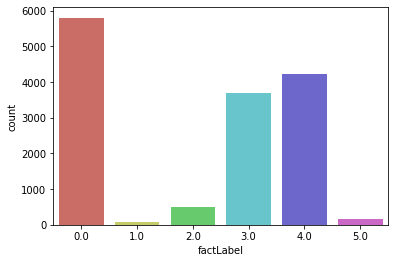

In [0]:
import seaborn as sns
sns.countplot(x='factLabel', data=train, palette='hls')


Here, we see that the number of articles per class is roughly balanced, which is helpful!

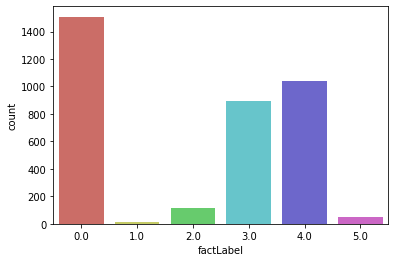

In [0]:
import seaborn as sns
sns.countplot(x='factLabel', data=test, palette='hls')

As we can see all datasets consist of different types of label-classes. Therefore all classes should be considered in the classification process and none of them should be dropped.

### **4.3 Visualize the data**

### **Pie chart**

**Visualization on train data**

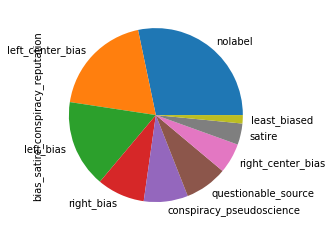

In [0]:
%matplotlib inline
train['bias_satire_conspiracy_reputation'].value_counts().plot(kind="pie")

**Visualization on test data**

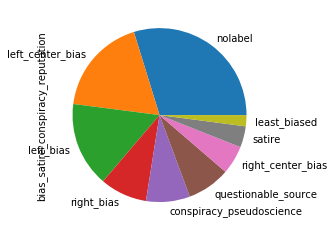

In [0]:
%matplotlib inline
test['bias_satire_conspiracy_reputation'].value_counts().plot(kind="pie")

**Grid Plot**

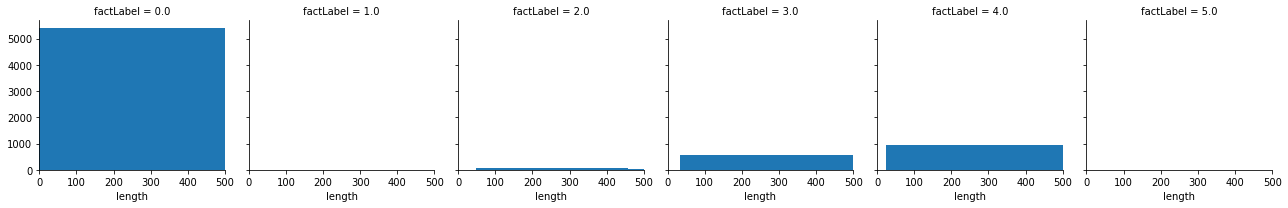

In [0]:
g = sns.FacetGrid(data=train, col='factLabel')
for i, ax in enumerate(g.axes.flat): # set every-other axis for testing purposes
       ax.set_xlim(0,500)
g.map(plt.hist, 'length', bins=50)

Seems like overall, the distribution of text length is similar across all labels. However, the number of text length seems to be skewed a lot higher for true and false labels.

### **Violin Plot**

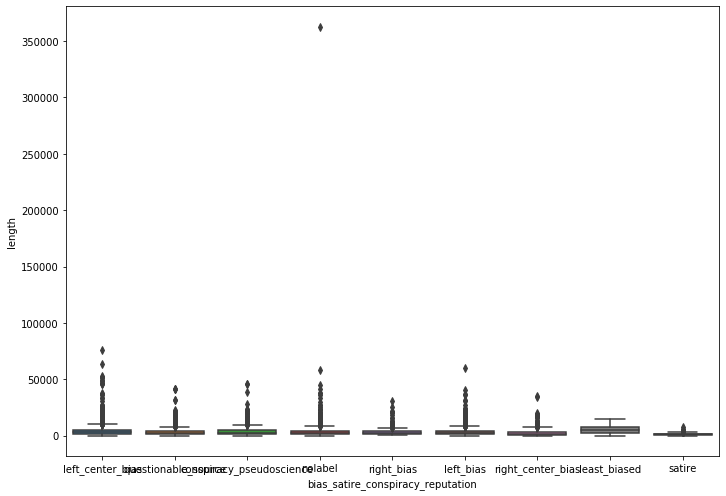

In [0]:
import seaborn as sns
a4_dims = (11.7, 8.27)
f, ax = plt.subplots(figsize=a4_dims)
sns.set_style("whitegrid")
sns.boxplot(x='bias_satire_conspiracy_reputation', y='length', data=train)

From the plot I inferred that 'left_center_bias' 'left_bias' and 'conspiracy_pseudo' labels have much longer text, but there are many outliers too which can be seen as points above the boxes

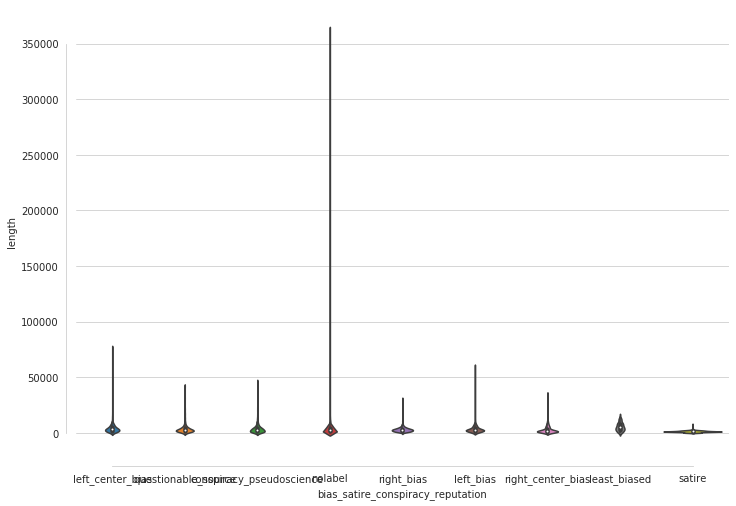

In [0]:
import seaborn as sns
a4_dims = (11.7, 8.27)
f, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x='bias_satire_conspiracy_reputation', y='length', data=train)
sns.despine(offset=10, trim=True);

### **Visualizing mostly used words corresponding to True, False, barely-true, mostly-true, half-true, pants-fire labels**

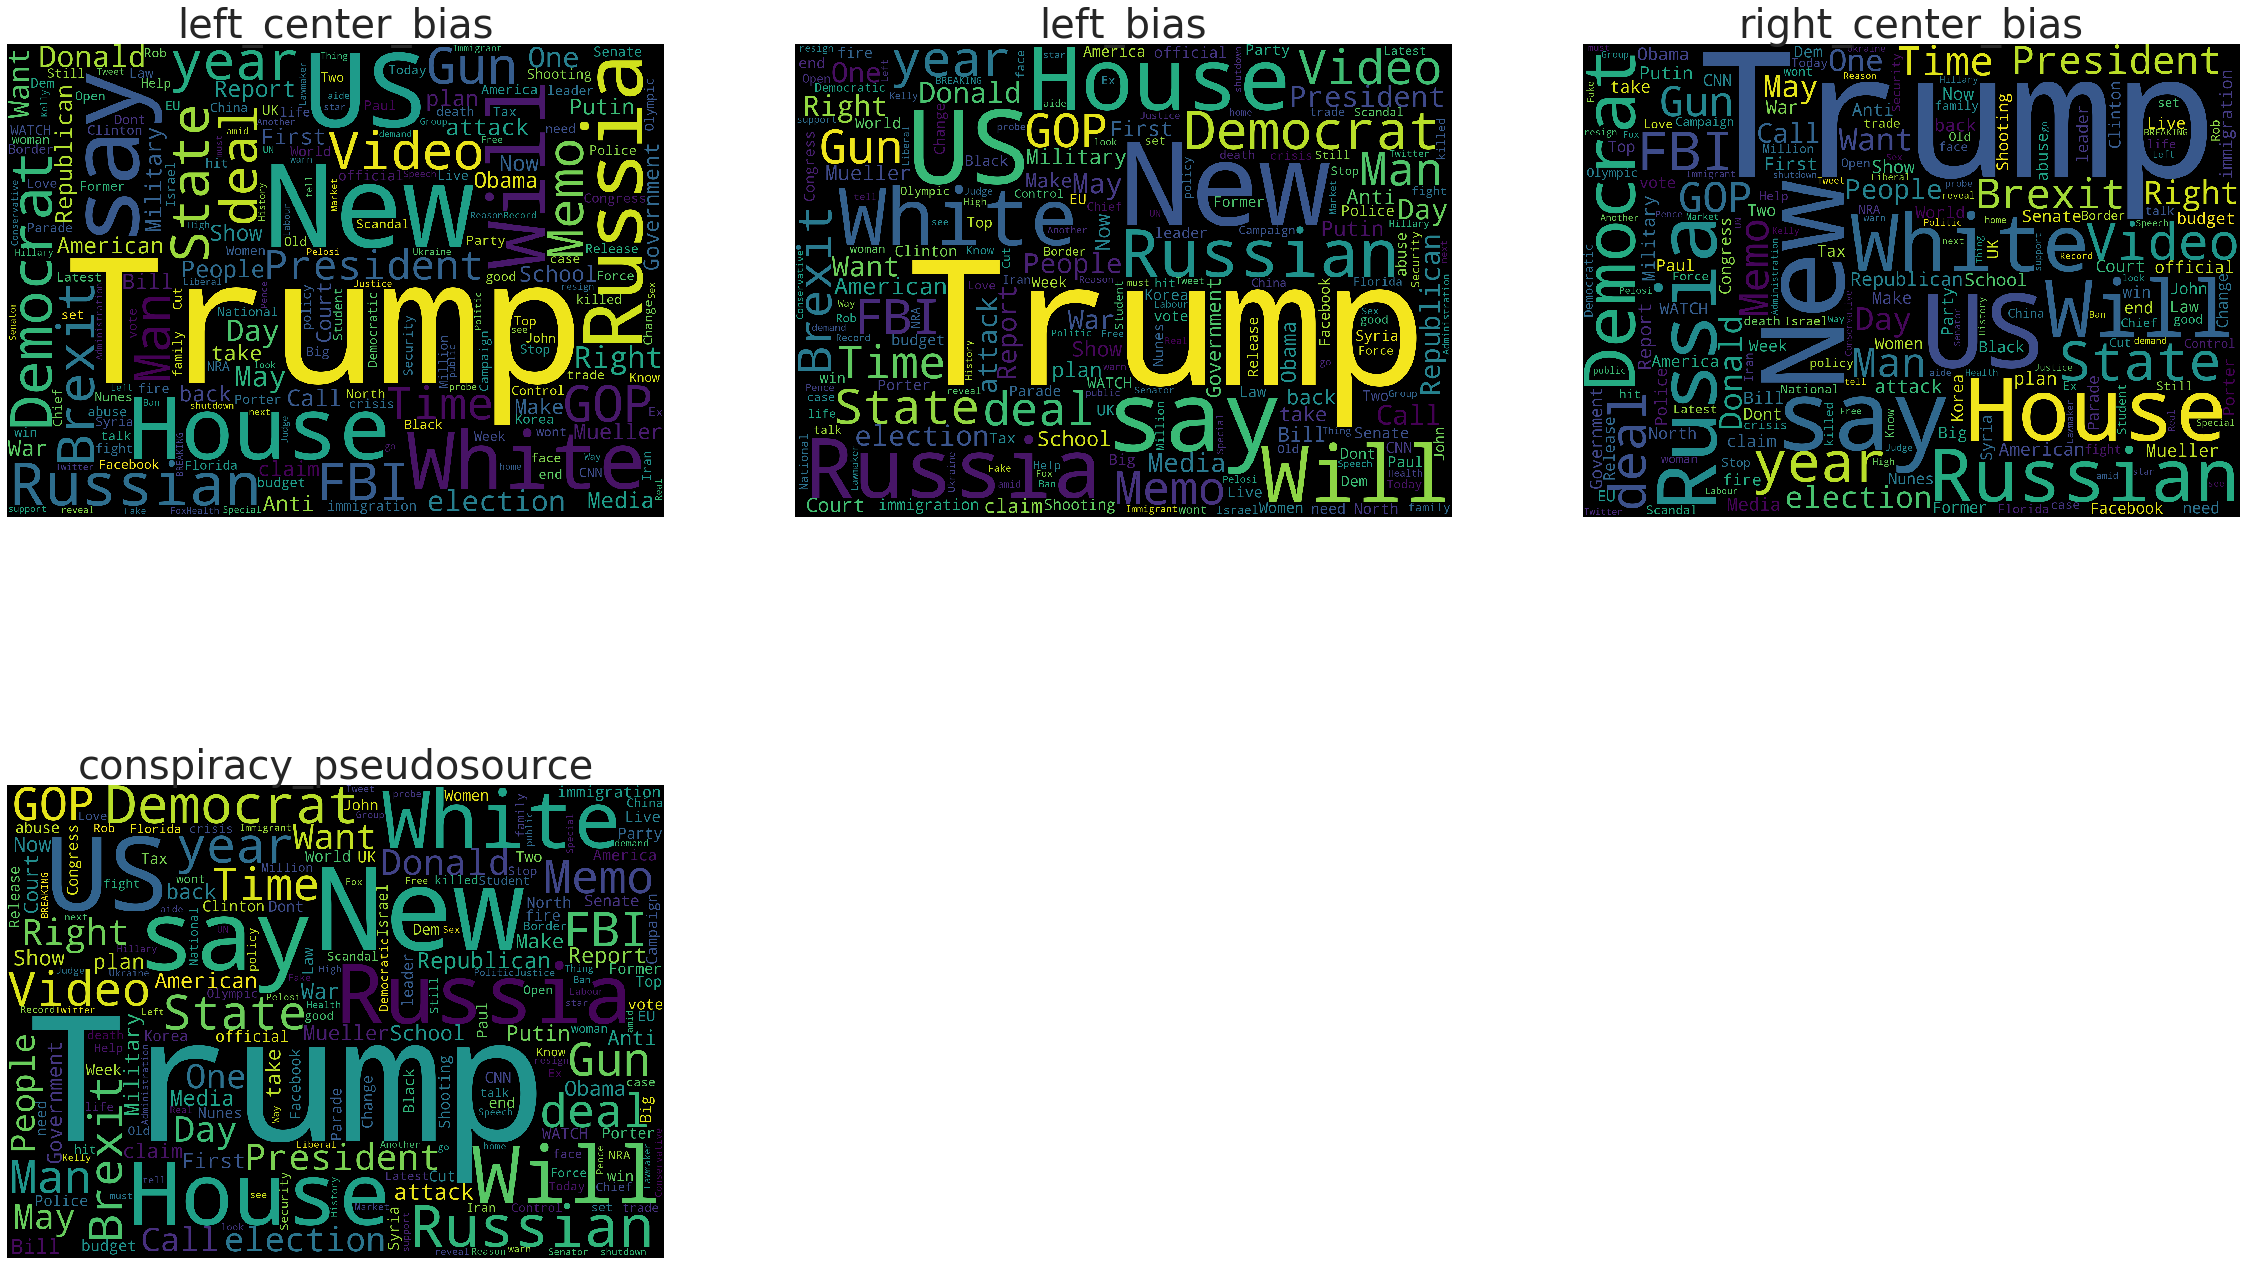

In [0]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# true
subset = train[train.bias_satire_conspiracy_reputation=='left_center_bias']
text = train['statement']
cloud_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))


plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("left_center_bias",fontsize=40)
plt.imshow(cloud_true)

# true
subset = train[train.bias_satire_conspiracy_reputation=='left_bias']
text = train['statement']
cloud_half_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("left_bias",fontsize=40)
plt.imshow(cloud_half_true)



# false
subset = train[train.bias_satire_conspiracy_reputation=='right_center_bias']
text = train['statement']
cloud_false = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("right_center_bias",fontsize=40)
plt.imshow(cloud_false)



# mostly-true
subset = train[train.bias_satire_conspiracy_reputation=='right_bias']
text = train['statement']
cloud_mostly_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("right_bias",fontsize=40)
plt.imshow(cloud_mostly_true)

# mostly-true
subset = train[train.bias_satire_conspiracy_reputation=='questionable_source']
text = train['statement']
cloud_mostly_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("questionable_source",fontsize=40)
plt.imshow(cloud_mostly_true)


# mostly-true
subset = train[train.bias_satire_conspiracy_reputation=='conspiracy_pseudosource']
text = train['statement']
cloud_mostly_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("conspiracy_pseudosource",fontsize=40)
plt.imshow(cloud_mostly_true)

### **Word Cloud Visualization for getting a sense of the statements**

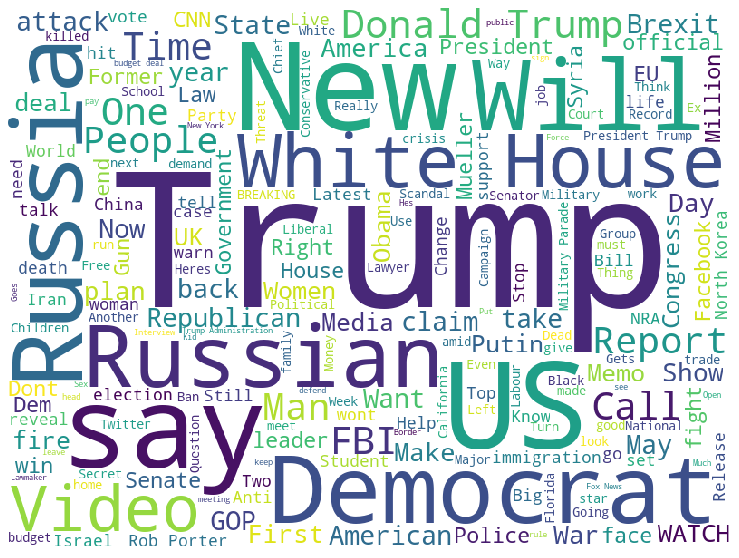

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train['statement']))

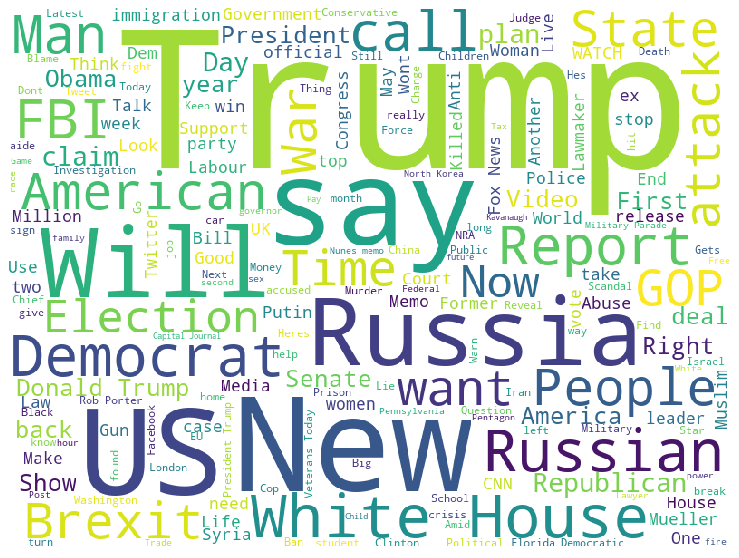

In [0]:
cloud(' '.join(test['statement']))

### **4.4: Retrieve the statistical details**

In [0]:
train.describe()

,id,length,factLabel,encoded_FactLabel
count,14456.000000,14456.000000,14456.000000,14456.0
mean,9006.670102,3407.289153,2.060252,2.0
std,5220.373602,4743.972599,1.767858,0.0
min,0.000000,0.000000,0.000000,2.0
25%,4484.750000,1346.750000,0.000000,2.0
50%,9010.500000,2511.000000,3.000000,2.0
75%,13510.250000,4313.000000,4.000000,2.0
max,18069.000000,362663.000000,5.000000,2.0


In [0]:
test.describe()

,id,length,factLabel,encoded_FactLabel
count,3615.000000,3615.000000,3615.000000,3615.0
mean,9148.288243,3578.567911,2.022407,2.0
std,5201.626714,7026.803398,1.784548,0.0
min,1.000000,27.000000,0.000000,2.0
25%,4695.000000,1396.500000,0.000000,2.0
50%,9113.000000,2585.000000,3.000000,2.0
75%,13664.000000,4327.000000,4.000000,2.0
max,18070.000000,362745.000000,5.000000,2.0


### **4.5: Calculate correlation**

**Group the training data based on the labels**

In [0]:
labels = train.groupby('bias_satire_conspiracy_reputation').mean()
labels.corr()

,id,length,factLabel,encoded_FactLabel
id,1.000000,-0.759224,-0.154854,NaN
length,-0.759224,1.000000,0.584680,NaN
factLabel,-0.154854,0.584680,1.000000,NaN
encoded_FactLabel,NaN,NaN,NaN,NaN


Feature selection or attribute evaluator consists of identifying the relevant features and ignoring the irrelevant ones from a dataset. The use of attribute evaluator methods enhances the performance of machine learning algorithms. Visualizing Correlation heatmap helps in better correlation-based feature selection

**Plot the pearson correlation matrix**

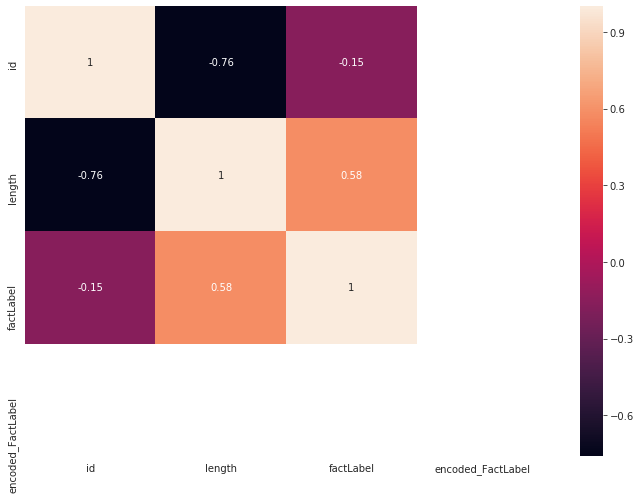

In [0]:
from matplotlib import pyplot
import seaborn as sns
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=labels.corr(), annot=True)

Looking at the map, false is strongly correlated with conspiracy_pseudo, and true seems strongly correlated with right_center_bias. There is also a negative correlation between false_counts and the other features.

### **4.6: Pair Plot** 

**Pair Plot to visualize the distribution of data in train set**

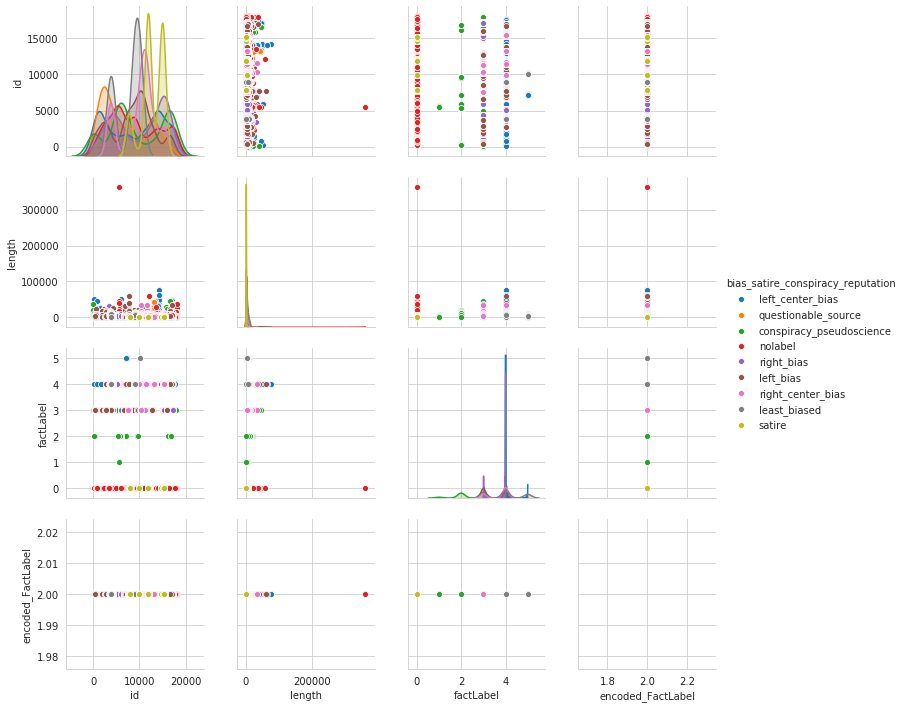

In [0]:
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=RuntimeWarning)
pair_plot = sns.pairplot(train, hue="bias_satire_conspiracy_reputation")

**Pair Plot to visualize the distribution of data in test set**

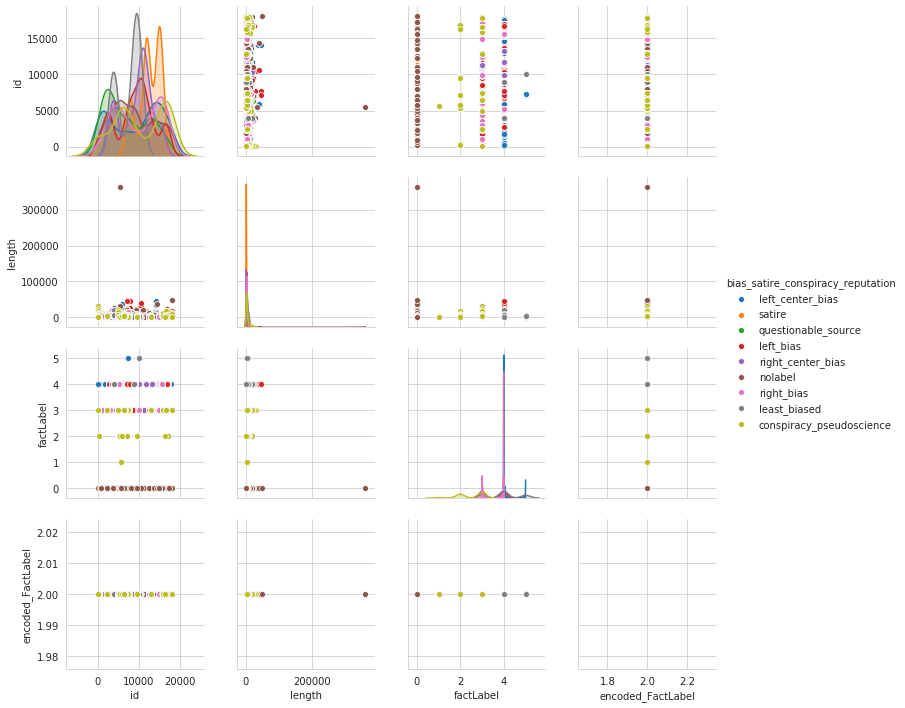

In [0]:
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=RuntimeWarning)
pair_plot = sns.pairplot(test, hue="bias_satire_conspiracy_reputation")

### **4.7: Gini score**
Not applicable

### **4.8: Feature Importance - XGBoost**
Not applicable

### **Step 5. Data Prep: Curation**

**Feature Selection using corelation matrix**

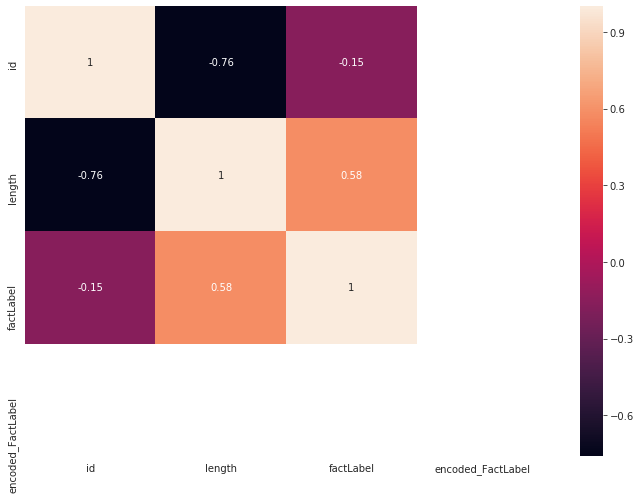

In [0]:
from matplotlib import pyplot
import seaborn as sns
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=labels.corr(), annot=True)

In [0]:
#Correlation with output variable
cor_target = abs(train["length"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

17069    49343
1137      2021
14646     3484
16158     2683
12154      968
         ...  
8087      3228
17739     1298
12752     5476
15266     1233
9003      7601
Name: length, Length: 14451, dtype: int64

### **5.2 Data Verification: Do we have enough data?**
Yes, we have enough data. “NELA” dataset from harvard is used for this project. The data set consists of 3 files: articles.db, labels.csv that can be used to run the NLP and ML lifecycle. The data consists of 4 main fields which includes the date, name, source, and content etc.

### **5.3 Possibility of Amalgamation1: Add Dataset 2**

**First Amalgamation:** For first amalgamation, I have amalgamated the Liar Liar dataset with labels.csv file.


###**NOTE:**  The code for amalgamation1(NELA + labels.csv ) can be found in the data preprocessing notebook.



**Retrieving label and context columns into X_train and Y_train respectively**

In [0]:

#Split the data into train and test sets
X_train=train["source"]
Y_train=train["factLabel"]

**Checking the count of context with respect to label**

In [0]:
CT = pd.crosstab(train['source'],train['factLabel'],margins=True)
CT.head()

factLabel,0.0,1.0,2.0,3.0,4.0,5.0,All
source,,,,,,,
21stCenturyWire,0,0,0,79,0,0,79
ABC News,0,0,0,0,77,0,77
AMERICAblog News,33,0,0,0,0,0,33
Activist Post,0,0,86,0,0,0,86
Addicting Info,0,0,0,81,0,0,81


**Sorting the values in the descending order with respect to count**

In [0]:
CT.sort_values('All', ascending=False)

factLabel,0.0,1.0,2.0,3.0,4.0,5.0,All
source,,,,,,,
All,5806,88,511,3684,4214,153,14456
MSNBC,0,0,0,90,0,0,90
Infowars,0,88,0,0,0,0,88
Alternet,0,0,0,88,0,0,88
Daily Mail,87,0,0,0,0,0,87
...,...,...,...,...,...,...,...
Counter Current News,0,0,0,17,0,0,17
Prepare For Change,10,0,0,0,0,0,10
Real News Right Now,10,0,0,0,0,0,10


**Visualizing the context**

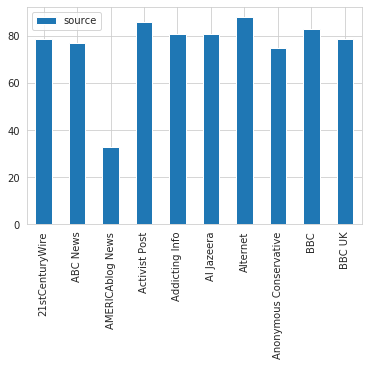

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = train['source'].value_counts().sort_index(ascending=True).head(10).plot('bar', ax=ax, legend=True)

**Checking the interview word in context column**

In [0]:
import numpy as np
mask = np.column_stack([train[col].str.contains("sott.net") for col in ['source']])
print (mask)
unique, counts = np.unique(mask, return_counts=True)
dictionary = dict(zip(unique, counts))

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


**Printing the total false and true values**

In [0]:
print(dictionary)

{False: 14381, True: 75}


**Visualize the data for barely true values**

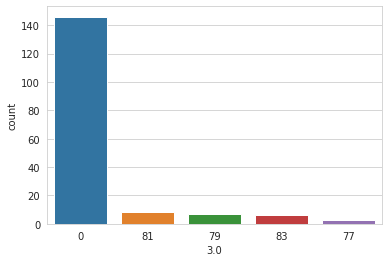

In [0]:
import seaborn as sns
#sns.countplot(x="left_center_bias", data=CT,order=CT["left_center_bias"].value_counts().iloc[:5].index)
sns.countplot(x=3.0, data=CT,order=CT[3.0].value_counts().iloc[:5].index)
plt.show()

In [0]:
train['mask'] = mask
mask

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

**Retrieving the dataset after preparation**

In [0]:
train.head()

,id,date,source,statement,content,length,factLabel,bias_satire_conspiracy_reputation,encoded_FactLabel,mask
17069,17069,2018-06-13,Washington Post,The Daily 202 Mark Sanfords primary loss shows...,THE BIG IDEA: Mark Sanford survived the fallou...,49343,4.0,left_center_bias,2,False
1137,1137,2018-02-11,Bipartisan Report,Trump Embarrasses Himself Big Time With Whiny ...,There will (hopefully) one day soon be a day w...,2021,0.0,questionable_source,2,False
14646,14646,2018-02-11,The New York Times,Trumps Infrastructure Plan Modest Federal Ince...,"Over a period of months, Mr. Trumps top econom...",3484,4.0,left_center_bias,2,False
16158,16158,2018-02-01,True Pundit,Former FBI Assistant Director Says Anti-Trump ...,With a much-debated House Intelligence Committ...,2683,2.0,conspiracy_pseudoscience,2,False
12154,12154,2018-02-12,The Conservative Tree House,Vanessa Trump Hospitalized Opened Mail With Un...,"NEW YORK Donald Trump Jr.s wife, Vanessa Trum...",968,0.0,nolabel,2,False


**After visualizing the data for the label column it looks unbalanced**

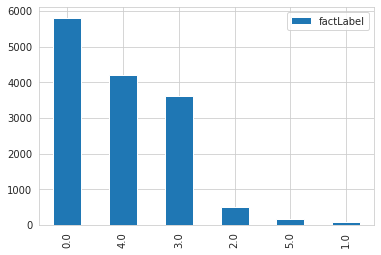

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = train[train['mask']==False]['factLabel'].value_counts().plot('bar', ax=ax, legend=True)

**Checking the tweet word in context column**

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


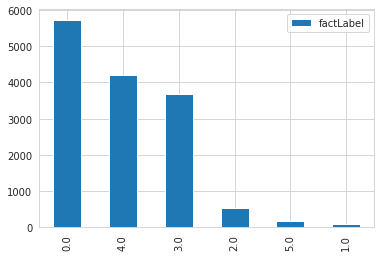

In [0]:
import numpy as np
twitter = np.column_stack([train[col].str.contains("The Daily Blog") for col in ['source']])
print (twitter)
unique, counts = np.unique(twitter, return_counts=True)
dict(zip(unique, counts))
train['The Daily Blog'] = twitter
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = train[train['The Daily Blog']==False]['factLabel'].value_counts().plot('bar', ax=ax, legend=True)

**Checking the debate word in context column**

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


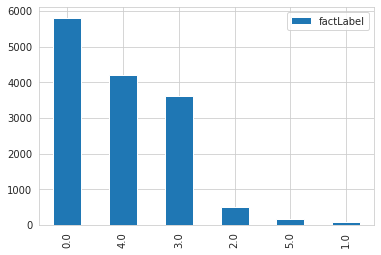

In [0]:
import numpy as np
debate = np.column_stack([train[col].str.contains("CNN") for col in ['source']])
print (debate)
unique, counts = np.unique(debate, return_counts=True)
dict(zip(unique, counts))
train['CNN'] = debate
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = train[train['CNN']==False]['factLabel'].value_counts().plot('bar', ax=ax, legend=True)

**Checking the President word is present or not in Speaker's job title column**

[[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]
{False: 11032, True: 3424}


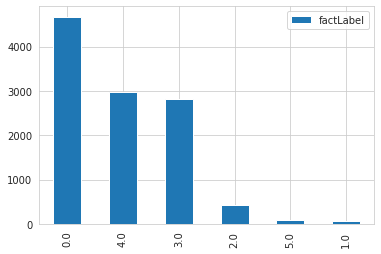

In [0]:
president = np.column_stack([train[col].str.contains("Donald") for col in ['content']])
print (president)
unique, counts = np.unique(president, return_counts=True)
dictionary_president = dict(zip(unique, counts))
print(dictionary_president)
train['Donald'] = president
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = train[train['Donald']==False]['factLabel'].value_counts().plot('bar', ax=ax, legend=True)

## **Step 9: Distillation - LDA**

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

Below we have applied LDA to a set of documents and split them into topics.

**Load the dataset and assign index to the 'statement' column**

In [0]:
import pandas as pd
#data = pd.read_excel("/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset/train.xlsx", error_bad_lines=False);
data_text = train[['statement']]
data_text['index'] = data_text.index
documents = data_text
#documents.head()

**Finding the number of documents**

In [0]:
len(documents)

14456

**Printing the first five documents**

In [0]:
documents[:5]

,statement,index
17069,The Daily 202 Mark Sanfords primary loss shows...,17069
1137,Trump Embarrasses Himself Big Time With Whiny ...,1137
14646,Trumps Infrastructure Plan Modest Federal Ince...,14646
16158,Former FBI Assistant Director Says Anti-Trump ...,16158
12154,Vanessa Trump Hospitalized Opened Mail With Un...,12154


### **5.4: Data Cleansing and Data Preprocessing**

We will perform the following steps:


*   Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
*   Words that have fewer than 3 characters are removed.
*   All stopwords are removed.
*   Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
*   Words are stemmed — words are reduced to their root form.







**Load Gensim and NLTK libraries**

In [0]:
import string
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


**Remove Stopwords and shortwords using nltk stopwords**

In [0]:
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
#Remove stop words
def remove_stop_and_short_words(text):
    text = [word.lower() for word in text.split() if (word.lower() not in sw) and (len(word)>3)]
    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Lemmatization using Wordnet Lemmatizer and Stemming using SnowBall Stemmer**

In [0]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

**Remove Punctuations using nltk**

In [0]:
#method to remove punctuations from textual data
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

**Preprocess text function**

In [0]:
def process_data(text):
    #print ('Input Text :: ' + text)
    text = remove_stop_and_short_words(text)
    #print('Stopwords and short words removed :: ' + text)
    text = lemmatize_stemming(text)
    #print('Lemmatized :: ' + text)
    text = remove_punctuation(text)
    #print('Punctuation removed :: ' + text)
    return text

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

**Select a document to preview after preprocessing**

In [0]:
doc_sample = documents[documents['index'] == 4310].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Trump', 'blasts', 'sick', 'loser', 'Peter', 'Strzok', 'sick', 'deal', 'with', 'Comey', 'Mueller', 'connections']


 tokenized and lemmatized document: 
['trump', 'blast', 'sick', 'loser', 'peter', 'strzok', 'sick', 'deal', 'comey', 'mueller', 'connect']


**Preprocess the statment text, saving the results as ‘processed_docs’**

In [0]:
processed_docs = documents['statement'].map(preprocess)

In [0]:
processed_docs[:10]

17069    [daili, mark, sanford, primari, loss, show, pe...
1137     [trump, embarrass, time, whini, sunday, twitte...
14646    [trump, infrastructur, plan, modest, feder, in...
16158    [assist, director, say, anti, trump, cabal, evid]
12154    [vanessa, trump, hospit, open, mail, unknown, ...
12479    [josi, canseco, outfit, fashion, critic, look,...
5704     [communist, environment, protect, citi, rig, c...
17954    [children, bite, shark, island, york, rare, at...
5521       [hillari, send, million, onward, resist, group]
9415               [trump, versus, traitor, capitol, hill]
Name: statement, dtype: object

### **Bag of words on the dataset**

In [0]:
dictionary = gensim.corpora.Dictionary(processed_docs)

**Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set**

In [0]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 cross
1 daili
2 loss
3 mark
4 peril
5 primari
6 sanford
7 show
8 trump
9 embarrass
10 fake


**Gensim filter_extremes**

Filter out tokens that appear in:


*   less than 15 documents (absolute number) or
*   more than 0.5 documents (fraction of total corpus size, not absolute number)
*   after the above two steps, keep only the first 100000 most frequent tokens






In [0]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

**Gensim doc2bow**

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(206, 1), (266, 1)]

**Preview Bag Of Words for our sample preprocessed document**

In [0]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 206 ("manafort") appears 1 time.
Word 266 ("mueller") appears 1 time.


### **Visualize the top 10 Statements in the dataset**

**Import the required libraries**

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

**Python function to plot the WordCloud**

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

**Visualize the topmost statements**

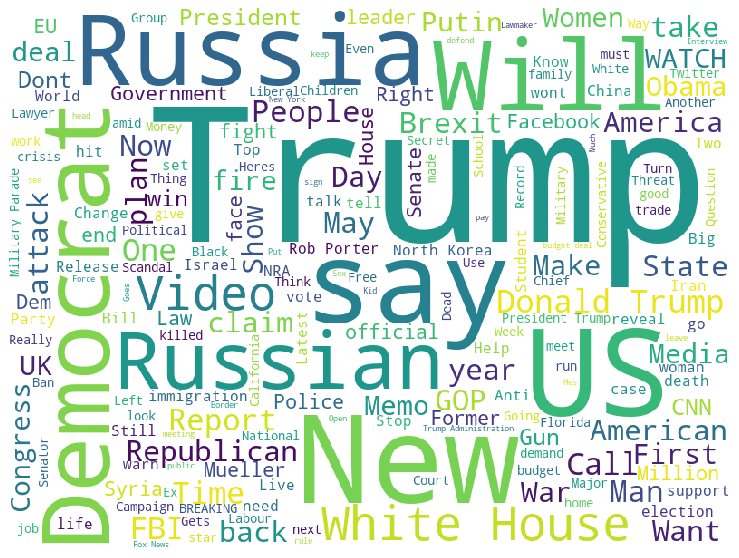

In [0]:
cloud(' '.join(train['statement']))

### **TF-IDF**

In [0]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [0]:
corpus_tfidf = tfidf[bow_corpus]

In [0]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.45294162108839364),
 (1, 0.5003203134345754),
 (2, 0.43001204728998715),
 (3, 0.4445286547271453),
 (4, 0.3792163991899123),
 (5, 0.13491593215010464)]


### **Running LDA using Bag of Words**

**Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’**

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

**For each topic, we will explore the words occuring in that topic and its relative weight**

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.042*"trump" + 0.013*"warn" + 0.012*"anti" + 0.010*"militari" + 0.010*"paul" + 0.009*"capit" + 0.008*"journal" + 0.008*"budget" + 0.008*"deal" + 0.007*"protest"
Topic: 1 
Words: 0.035*"trump" + 0.016*"brexit" + 0.014*"go" + 0.012*"tell" + 0.012*"iran" + 0.012*"deal" + 0.011*"syria" + 0.009*"say" + 0.008*"michael" + 0.007*"liber"
Topic: 2 
Words: 0.088*"trump" + 0.018*"democrat" + 0.016*"elect" + 0.014*"right" + 0.014*"russia" + 0.013*"presid" + 0.010*"donald" + 0.010*"republican" + 0.009*"state" + 0.009*"nation"
Topic: 3 
Words: 0.043*"trump" + 0.017*"democrat" + 0.010*"pelosi" + 0.010*"today" + 0.010*"care" + 0.009*"world" + 0.008*"say" + 0.007*"cut" + 0.006*"parti" + 0.006*"give"
Topic: 4 
Words: 0.045*"hous" + 0.037*"white" + 0.028*"trump" + 0.015*"abus" + 0.011*"porter" + 0.009*"student" + 0.008*"call" + 0.007*"time" + 0.007*"alleg" + 0.006*"video"
Topic: 5 
Words: 0.030*"trump" + 0.024*"say" + 0.016*"russian" + 0.014*"year" + 0.014*"video" + 0.010*"shoot" + 0.009

**Topics Identified**


*   Vote percentage from Texas state in amercian elections
*   Expenditure by state on health care every year
*   Republican and Democrats elections vote percentage
*   Unemployment rate and american businesses
*   Elections - Vote percentage for Hillary Clinton
*   Health care expenditure
*   President Obama and american healthcare
*   Illegal immigrants
*   Expenditure by state on schools
*   Obama's plans presented to Republicans

### **Visualize the topics with PyLDAvis**

In [0]:
pip install pyldavis

     |████████████████████████████████| 1.6MB 5.0MB/s 
     |████████████████████████████████| 552kB 47.5MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=c9705f2da087f10d9228ace934f402cb4fcf951495606b50181cba13da72f9ff
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32040 sha256=e8ec2dea5b8b411459d3ff0e876066ab702c839686babd1af644a4d82393db83
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyldavis funcy


In [0]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.014670  0.032248       1        1  12.895028
8      0.000174  0.034539       2        1  11.123591
4      0.136145  0.010427       3        1  10.679141
0     -0.061528  0.021814       4        1  10.083156
1     -0.088615 -0.016562       5        1   9.510220
5      0.072502 -0.060128       6        1   9.383757
6      0.140767 -0.016492       7        1   9.250890
3     -0.066604 -0.016850       8        1   9.232185
7     -0.043872  0.174134       9        1   9.014280
9     -0.074299 -0.163129      10        1   8.827756, topic_info=    Category         Freq     Term        Total  loglift  logprob
55   Default   461.000000     hous   461.000000  30.0000  30.0000
25   Default   375.000000    white   375.000000  29.0000  29.0000
5    Default  2563.000000    trump  2563.000000  28.0000  28.0000
266  Default   181.000000  mueller   181.000000  27.0000  27.0000
108  Default   117.000000    olymp   117.000000  26.0000  26.0000
..       ...          ...      ...          ...      ...      ...
160  Topic10    36.290585    video   267.985504   0.4279  -5.1067
245  Topic10    35.682655     year   280.622406   0.3649  -5.1236
69   Topic10    32.120754   report   276.243896   0.2755  -5.2288
155  Topic10    28.653606    women   135.893967   0.8707  -5.3430
187  Topic10    27.187164   demand    78.285614   1.3697  -5.3955

[631 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
643       1  0.042126       abort
643       2  0.014042       abort
643       3  0.112335       abort
643       4  0.042126       abort
643       5  0.014042       abort
...     ...       ...         ...
988       1  0.805431     zimbabw
988       2  0.061956     zimbabw
1226      1  0.055069  zuckerberg
1226      6  0.220275  zuckerberg
1226      9  0.660825  zuckerberg

[3091 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 5, 1, 2, 6, 7, 4, 8, 10])

### **Running LDA using TF-IDF**

**Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’**

In [0]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

**For each topic, we will explore the words occuring in that topic and its relative weight**

In [0]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.014*"trump" + 0.011*"democrat" + 0.009*"brexit" + 0.007*"american" + 0.006*"say" + 0.006*"worker" + 0.006*"want" + 0.005*"thing" + 0.005*"fight" + 0.005*"right"
Topic: 1 Word: 0.015*"trump" + 0.006*"john" + 0.006*"video" + 0.006*"anti" + 0.005*"russian" + 0.005*"democrat" + 0.005*"republican" + 0.005*"rule" + 0.005*"ukrain" + 0.005*"support"
Topic: 2 Word: 0.013*"trump" + 0.008*"peopl" + 0.008*"immigr" + 0.007*"report" + 0.007*"senat" + 0.006*"america" + 0.006*"shutdown" + 0.006*"go" + 0.006*"congress" + 0.005*"deal"
Topic: 3 Word: 0.012*"trump" + 0.006*"song" + 0.006*"watch" + 0.006*"want" + 0.005*"tri" + 0.005*"brexit" + 0.005*"week" + 0.005*"offic" + 0.004*"arrest" + 0.004*"issu"
Topic: 4 Word: 0.009*"trump" + 0.008*"nation" + 0.007*"video" + 0.007*"labour" + 0.006*"get" + 0.005*"univers" + 0.005*"veteran" + 0.005*"stop" + 0.005*"democrat" + 0.005*"say"
Topic: 5 Word: 0.015*"trump" + 0.010*"white" + 0.010*"hous" + 0.010*"year" + 0.009*"russia" + 0.007*"deal" + 0.007

### **Performance evaluation by classifying sample document using LDA Bag of Words model**

**Let's check whether our test document would be classified**

In [0]:
processed_docs[4310]

['trump',
 'blast',
 'sick',
 'loser',
 'peter',
 'strzok',
 'sick',
 'deal',
 'comey',
 'mueller',
 'connect']

**Print the score for each topic**

In [0]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6999843120574951	 
Topic: 0.023*"trump" + 0.015*"mueller" + 0.012*"court" + 0.011*"break" + 0.011*"russia" + 0.009*"prison" + 0.007*"target" + 0.006*"isra" + 0.006*"health" + 0.006*"super"

Score: 0.03333936259150505	 
Topic: 0.042*"trump" + 0.013*"warn" + 0.012*"anti" + 0.010*"militari" + 0.010*"paul" + 0.009*"capit" + 0.008*"journal" + 0.008*"budget" + 0.008*"deal" + 0.007*"protest"

Score: 0.03333808854222298	 
Topic: 0.088*"trump" + 0.018*"democrat" + 0.016*"elect" + 0.014*"right" + 0.014*"russia" + 0.013*"presid" + 0.010*"donald" + 0.010*"republican" + 0.009*"state" + 0.009*"nation"

Score: 0.03333491086959839	 
Topic: 0.030*"trump" + 0.024*"say" + 0.016*"russian" + 0.014*"year" + 0.014*"video" + 0.010*"shoot" + 0.009*"work" + 0.008*"inform" + 0.008*"watch" + 0.008*"america"

Score: 0.03333447128534317	 
Topic: 0.043*"trump" + 0.017*"democrat" + 0.010*"pelosi" + 0.010*"today" + 0.010*"care" + 0.009*"world" + 0.008*"say" + 0.007*"cut" + 0.006*"parti" + 0.006*"give"

Score

Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.

### **Performance evaluation by classifying sample document using LDA TF-IDF model**

In [0]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.42087531089782715	 
Topic: 0.011*"trump" + 0.006*"donald" + 0.006*"open" + 0.005*"say" + 0.005*"attack" + 0.005*"woman" + 0.005*"read" + 0.004*"economi" + 0.004*"alex" + 0.004*"close"

Score: 0.31240957975387573	 
Topic: 0.016*"trump" + 0.011*"memo" + 0.009*"presid" + 0.007*"mueller" + 0.007*"school" + 0.006*"nune" + 0.006*"tell" + 0.005*"build" + 0.005*"shoot" + 0.005*"attack"

Score: 0.03334527462720871	 
Topic: 0.020*"trump" + 0.006*"korea" + 0.006*"north" + 0.006*"control" + 0.006*"say" + 0.006*"trade" + 0.006*"russia" + 0.006*"state" + 0.005*"shoot" + 0.005*"vote"

Score: 0.03334478288888931	 
Topic: 0.013*"trump" + 0.008*"peopl" + 0.008*"immigr" + 0.007*"report" + 0.007*"senat" + 0.006*"america" + 0.006*"shutdown" + 0.006*"go" + 0.006*"congress" + 0.005*"deal"

Score: 0.03333969786763191	 
Topic: 0.014*"trump" + 0.011*"democrat" + 0.009*"brexit" + 0.007*"american" + 0.006*"say" + 0.006*"worker" + 0.006*"want" + 0.005*"thing" + 0.005*"fight" + 0.005*"right"

Score: 0.033

Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.

### **Testing Bag of Words model on unseen document**

In [0]:
unseen_document = 'Fake news is getting weaponized and it has proven effective.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5080887675285339	 Topic: 0.023*"trump" + 0.015*"mueller" + 0.012*"court" + 0.011*"break" + 0.011*"russia"
Score: 0.37760621309280396	 Topic: 0.014*"want" + 0.013*"senat" + 0.011*"know" + 0.011*"media" + 0.010*"news"
Score: 0.014290235005319118	 Topic: 0.030*"trump" + 0.024*"say" + 0.016*"russian" + 0.014*"year" + 0.014*"video"
Score: 0.014289643615484238	 Topic: 0.035*"trump" + 0.016*"brexit" + 0.014*"go" + 0.012*"tell" + 0.012*"iran"
Score: 0.01428825780749321	 Topic: 0.088*"trump" + 0.018*"democrat" + 0.016*"elect" + 0.014*"right" + 0.014*"russia"
Score: 0.014288018457591534	 Topic: 0.037*"trump" + 0.014*"offici" + 0.013*"memo" + 0.011*"american" + 0.010*"brexit"
Score: 0.014287745580077171	 Topic: 0.043*"trump" + 0.017*"democrat" + 0.010*"pelosi" + 0.010*"today" + 0.010*"care"
Score: 0.014287186786532402	 Topic: 0.024*"trump" + 0.015*"olymp" + 0.014*"open" + 0.010*"love" + 0.010*"govern"
Score: 0.014287041500210762	 Topic: 0.045*"hous" + 0.037*"white" + 0.028*"trump" + 0.01

### **Testing TF-IDF model on unseen document**

In [0]:
unseen_document = 'Fake news is getting weaponized and it has proven effective.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

Score: 0.8714052438735962	 Topic: 0.020*"trump" + 0.006*"korea" + 0.006*"north" + 0.006*"control" + 0.006*"say"
Score: 0.014290385879576206	 Topic: 0.015*"trump" + 0.006*"john" + 0.006*"video" + 0.006*"anti" + 0.005*"russian"
Score: 0.01429014839231968	 Topic: 0.009*"trump" + 0.008*"nation" + 0.007*"video" + 0.007*"labour" + 0.006*"get"
Score: 0.01428921427577734	 Topic: 0.015*"trump" + 0.010*"white" + 0.010*"hous" + 0.010*"year" + 0.009*"russia"
Score: 0.014288211241364479	 Topic: 0.011*"trump" + 0.006*"donald" + 0.006*"open" + 0.005*"say" + 0.005*"attack"
Score: 0.014288114383816719	 Topic: 0.012*"trump" + 0.006*"song" + 0.006*"watch" + 0.006*"want" + 0.005*"tri"
Score: 0.01428755559027195	 Topic: 0.011*"say" + 0.011*"trump" + 0.009*"hous" + 0.008*"time" + 0.007*"presid"
Score: 0.014287305064499378	 Topic: 0.016*"trump" + 0.011*"memo" + 0.009*"presid" + 0.007*"mueller" + 0.007*"school"
Score: 0.014287158846855164	 Topic: 0.013*"trump" + 0.008*"peopl" + 0.008*"immigr" + 0.007*"report"

## **Speaker Sentiment Analysis to assess Credibility**

Sentiment Analysis is a linguistic analysis technique that identifies opinion in a piece of text. It is used to verify the credibilty of the speaker for a particular statement.

**Import the required libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from wordcloud import WordCloud

sns.set(color_codes=True)

%matplotlib inline

**Load the training dataset**

In [0]:
#train_news = pd.read_excel("/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset/train.xlsx")
train.head(5)

,id,date,source,statement,content,length,factLabel,bias_satire_conspiracy_reputation,encoded_FactLabel,mask,The Daily Blog,CNN,Donald
17069,17069,2018-06-13,Washington Post,The Daily 202 Mark Sanfords primary loss shows...,THE BIG IDEA: Mark Sanford survived the fallou...,49343,4.0,left_center_bias,2,False,False,False,True
1137,1137,2018-02-11,Bipartisan Report,Trump Embarrasses Himself Big Time With Whiny ...,There will (hopefully) one day soon be a day w...,2021,0.0,questionable_source,2,False,False,False,False
14646,14646,2018-02-11,The New York Times,Trumps Infrastructure Plan Modest Federal Ince...,"Over a period of months, Mr. Trumps top econom...",3484,4.0,left_center_bias,2,False,False,False,False
16158,16158,2018-02-01,True Pundit,Former FBI Assistant Director Says Anti-Trump ...,With a much-debated House Intelligence Committ...,2683,2.0,conspiracy_pseudoscience,2,False,False,False,True
12154,12154,2018-02-12,The Conservative Tree House,Vanessa Trump Hospitalized Opened Mail With Un...,"NEW YORK Donald Trump Jr.s wife, Vanessa Trum...",968,0.0,nolabel,2,False,False,False,True


In [0]:
train.rename(columns = {'source':'speaker'}, inplace = True) 
train


,id,date,speaker,statement,content,length,factLabel,bias_satire_conspiracy_reputation,encoded_FactLabel,mask,The Daily Blog,CNN,Donald
17069,17069,2018-06-13,Washington Post,The Daily 202 Mark Sanfords primary loss shows...,THE BIG IDEA: Mark Sanford survived the fallou...,49343,4.0,left_center_bias,2,False,False,False,True
1137,1137,2018-02-11,Bipartisan Report,Trump Embarrasses Himself Big Time With Whiny ...,There will (hopefully) one day soon be a day w...,2021,0.0,questionable_source,2,False,False,False,False
14646,14646,2018-02-11,The New York Times,Trumps Infrastructure Plan Modest Federal Ince...,"Over a period of months, Mr. Trumps top econom...",3484,4.0,left_center_bias,2,False,False,False,False
16158,16158,2018-02-01,True Pundit,Former FBI Assistant Director Says Anti-Trump ...,With a much-debated House Intelligence Committ...,2683,2.0,conspiracy_pseudoscience,2,False,False,False,True
12154,12154,2018-02-12,The Conservative Tree House,Vanessa Trump Hospitalized Opened Mail With Un...,"NEW YORK Donald Trump Jr.s wife, Vanessa Trum...",968,0.0,nolabel,2,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,8087,2018-08-15,Newswars,Sleeping Habits Linked to Fat Level,"People with prediabetes who go to bed later, e...",3228,0.0,questionable_source,2,False,False,False,False
17739,17739,2018-03-22,oann,Maldives lifts state of emergency after 45 days,MALE (Reuters) Maldives President Abdulla Yam...,1298,0.0,nolabel,2,False,False,False,False
12752,12752,2018-08-01,The Daily Mirror,Arsenal 1-1 Chelsea 6-5 penalties 5 talking po...,Alex Iwobi was Arsenal's hero in their penalty...,5476,3.0,left_bias,2,False,False,False,False
15266,15266,2018-07-31,The Sun,Dog lover has legs AMPUTATED after single lick...,A DOG owner lost both his legs to a million-to...,1233,3.0,right_bias,2,False,False,False,False


**Describe the training dataset**

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14456 entries, 17069 to 9003
Data columns (total 13 columns):
id                                   14456 non-null int64
date                                 14456 non-null object
speaker                              14456 non-null object
statement                            14456 non-null object
content                              14456 non-null object
length                               14456 non-null int64
factLabel                            14456 non-null float64
bias_satire_conspiracy_reputation    14456 non-null object
encoded_FactLabel                    14456 non-null int64
mask                                 14456 non-null bool
The Daily Blog                       14456 non-null bool
CNN                                  14456 non-null bool
Donald                               14456 non-null bool
dtypes: bool(4), float64(1), int64(3), object(5)
memory usage: 1.2+ MB


In [0]:
# Get the how many words each 'speaker' has?
def get_author_rep(speaker):
    counts = {}
    for x in speaker:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [0]:
# Get the name of the 'speaker' with more contributions.
def max_author(speaker):
    maxi = -1
    for k in speaker:
        if(speaker[k] > maxi):
            maxi = speaker[k]
    return k, maxi

**Speaker with more contributions**

In [0]:
count_speaker = get_author_rep(train['speaker'])
speaker, maxi = max_author(count_speaker)
print("'"+ speaker +"' with maximum of "+ str(maxi) + " words.")

'FT Westminster Blog' with maximum of 90 words.


**Positive counts average**

In [0]:
positive_count_average = train[train['bias_satire_conspiracy_reputation']=="right_bias"].mean()
print('Positive counts average: ', positive_count_average)

Positive counts average:  id                   9992.024922
length               3017.275701
factLabel               3.124611
encoded_FactLabel       2.000000
mask                    0.000000
The Daily Blog          0.000000
CNN                     0.000000
Donald                  0.200935
dtype: float64


**Barely true count average**

In [0]:
barely_true_count_average = train[train['bias_satire_conspiracy_reputation']=="left_center_bias"].mean()
print('Barely true counts average: ', barely_true_count_average)

Barely true counts average:  id                   9053.799571
length               4073.966714
factLabel               3.880458
encoded_FactLabel       2.000000
mask                    0.000000
The Daily Blog          0.000000
CNN                     0.000000
Donald                  0.244094
dtype: float64


**False counts average**

In [0]:
false_count_average = train[train['bias_satire_conspiracy_reputation']=="left_bias"].mean()
print('False counts average: ', false_count_average)

False counts average:  id                   8585.223639
length               3498.219813
factLabel               3.437075
encoded_FactLabel       2.000000
mask                    0.000000
The Daily Blog          0.000000
CNN                     0.035289
Donald                  0.386905
dtype: float64


**Using the AFIN-111 json**

The barely true and false counts average is the same.

In [0]:
# Hardcoding the Afinn-111 json
afinn_data = {"abandon":"-2","abandoned":"-2","abandons":"-2","abducted":"-2","abduction":"-2","abductions":"-2","abhor":"-3","abhorred":"-3","abhorrent":"-3","abhors":"-3","abilities":"2","ability":"2","aboard":"1","absentee":"-1","absentees":"-1","absolve":"2","absolved":"2","absolves":"2","absolving":"2","absorbed":"1","abuse":"-3","abused":"-3","abuses":"-3","abusive":"-3","accept":"1","accepted":"1","accepting":"1","accepts":"1","accident":"-2","accidental":"-2","accidentally":"-2","accidents":"-2","accomplish":"2","accomplished":"2","accomplishes":"2","accusation":"-2","accusations":"-2","accuse":"-2","accused":"-2","accuses":"-2","accusing":"-2","ache":"-2","achievable":"1","aching":"-2","acquit":"2","acquits":"2","acquitted":"2","acquitting":"2","acrimonious":"-3","active":"1","adequate":"1","admire":"3","admired":"3","admires":"3","admiring":"3","admit":"-1","admits":"-1","admitted":"-1","admonish":"-2","admonished":"-2","adopt":"1","adopts":"1","adorable":"3","adore":"3","adored":"3","adores":"3","advanced":"1","advantage":"2","advantages":"2","adventure":"2","adventures":"2","adventurous":"2","affected":"-1","affection":"3","affectionate":"3","afflicted":"-1","affronted":"-1","afraid":"-2","aggravate":"-2","aggravated":"-2","aggravates":"-2","aggravating":"-2","aggression":"-2","aggressions":"-2","aggressive":"-2","aghast":"-2","agog":"2","agonise":"-3","agonised":"-3","agonises":"-3","agonising":"-3","agonize":"-3","agonized":"-3","agonizes":"-3","agonizing":"-3","agree":"1","agreeable":"2","agreed":"1","agreement":"1","agrees":"1","alarm":"-2","alarmed":"-2","alarmist":"-2","alarmists":"-2","alas":"-1","alert":"-1","alienation":"-2","alive":"1","allergic":"-2","allow":"1","alone":"-2","amaze":"2","amazed":"2","amazes":"2","amazing":"4","ambitious":"2","ambivalent":"-1","amuse":"3","amused":"3","amusement":"3","amusements":"3","anger":"-3","angers":"-3","angry":"-3","anguish":"-3","anguished":"-3","animosity":"-2","annoy":"-2","annoyance":"-2","annoyed":"-2","annoying":"-2","annoys":"-2","antagonistic":"-2","anti":"-1","anticipation":"1","anxiety":"-2","anxious":"-2","apathetic":"-3","apathy":"-3","apeshit":"-3","apocalyptic":"-2","apologise":"-1","apologised":"-1","apologises":"-1","apologising":"-1","apologize":"-1","apologized":"-1","apologizes":"-1","apologizing":"-1","apology":"-1","appalled":"-2","appalling":"-2","appease":"2","appeased":"2","appeases":"2","appeasing":"2","applaud":"2","applauded":"2","applauding":"2","applauds":"2","applause":"2","appreciate":"2","appreciated":"2","appreciates":"2","appreciating":"2","appreciation":"2","apprehensive":"-2","approval":"2","approved":"2","approves":"2","ardent":"1","arrest":"-2","arrested":"-3","arrests":"-2","arrogant":"-2","ashame":"-2","ashamed":"-2","ass":"-4","assassination":"-3","assassinations":"-3","asset":"2","assets":"2","assfucking":"-4","asshole":"-4","astonished":"2","astound":"3","astounded":"3","astounding":"3","astoundingly":"3","astounds":"3","attack":"-1","attacked":"-1","attacking":"-1","attacks":"-1","attract":"1","attracted":"1","attracting":"2","attraction":"2","attractions":"2","attracts":"1","audacious":"3","authority":"1","avert":"-1","averted":"-1","averts":"-1","avid":"2","avoid":"-1","avoided":"-1","avoids":"-1","await":"-1","awaited":"-1","awaits":"-1","award":"3","awarded":"3","awards":"3","awesome":"4","awful":"-3","awkward":"-2","axe":"-1","axed":"-1","backed":"1","backing":"2","backs":"1","bad":"-3","badass":"-3","badly":"-3","bailout":"-2","bamboozle":"-2","bamboozled":"-2","bamboozles":"-2","ban":"-2","banish":"-1","bankrupt":"-3","bankster":"-3","banned":"-2","bargain":"2","barrier":"-2","bastard":"-5","bastards":"-5","battle":"-1","battles":"-1","beaten":"-2","beatific":"3","beating":"-1","beauties":"3","beautiful":"3","beautifully":"3","beautify":"3","belittle":"-2","belittled":"-2","beloved":"3","benefit":"2","benefits":"2","benefitted":"2","benefitting":"2","bereave":"-2","bereaved":"-2","bereaves":"-2","bereaving":"-2","best":"3","betray":"-3","betrayal":"-3","betrayed":"-3","betraying":"-3","betrays":"-3","better":"2","bias":"-1","biased":"-2","big":"1","bitch":"-5","bitches":"-5","bitter":"-2","bitterly":"-2","bizarre":"-2","blah":"-2","blame":"-2","blamed":"-2","blames":"-2","blaming":"-2","bless":"2","blesses":"2","blessing":"3","blind":"-1","bliss":"3","blissful":"3","blithe":"2","block":"-1","blockbuster":"3","blocked":"-1","blocking":"-1","blocks":"-1","bloody":"-3","blurry":"-2","boastful":"-2","bold":"2","boldly":"2","bomb":"-1","boost":"1","boosted":"1","boosting":"1","boosts":"1","bore":"-2","bored":"-2","boring":"-3","bother":"-2","bothered":"-2","bothers":"-2","bothersome":"-2","boycott":"-2","boycotted":"-2","boycotting":"-2","boycotts":"-2","brainwashing":"-3","brave":"2","breakthrough":"3","breathtaking":"5","bribe":"-3","bright":"1","brightest":"2","brightness":"1","brilliant":"4","brisk":"2","broke":"-1","broken":"-1","brooding":"-2","bullied":"-2","bullshit":"-4","bully":"-2","bullying":"-2","bummer":"-2","buoyant":"2","burden":"-2","burdened":"-2","burdening":"-2","burdens":"-2","calm":"2","calmed":"2","calming":"2","calms":"2","can't stand":"-3","cancel":"-1","cancelled":"-1","cancelling":"-1","cancels":"-1","cancer":"-1","capable":"1","captivated":"3","care":"2","carefree":"1","careful":"2","carefully":"2","careless":"-2","cares":"2","cashing in":"-2","casualty":"-2","catastrophe":"-3","catastrophic":"-4","cautious":"-1","celebrate":"3","celebrated":"3","celebrates":"3","celebrating":"3","censor":"-2","censored":"-2","censors":"-2","certain":"1","chagrin":"-2","chagrined":"-2","challenge":"-1","chance":"2","chances":"2","chaos":"-2","chaotic":"-2","charged":"-3","charges":"-2","charm":"3","charming":"3","charmless":"-3","chastise":"-3","chastised":"-3","chastises":"-3","chastising":"-3","cheat":"-3","cheated":"-3","cheater":"-3","cheaters":"-3","cheats":"-3","cheer":"2","cheered":"2","cheerful":"2","cheering":"2","cheerless":"-2","cheers":"2","cheery":"3","cherish":"2","cherished":"2","cherishes":"2","cherishing":"2","chic":"2","childish":"-2","chilling":"-1","choke":"-2","choked":"-2","chokes":"-2","choking":"-2","clarifies":"2","clarity":"2","clash":"-2","classy":"3","clean":"2","cleaner":"2","clear":"1","cleared":"1","clearly":"1","clears":"1","clever":"2","clouded":"-1","clueless":"-2","cock":"-5","cocksucker":"-5","cocksuckers":"-5","cocky":"-2","coerced":"-2","collapse":"-2","collapsed":"-2","collapses":"-2","collapsing":"-2","collide":"-1","collides":"-1","colliding":"-1","collision":"-2","collisions":"-2","colluding":"-3","combat":"-1","combats":"-1","comedy":"1","comfort":"2","comfortable":"2","comforting":"2","comforts":"2","commend":"2","commended":"2","commit":"1","commitment":"2","commits":"1","committed":"1","committing":"1","compassionate":"2","compelled":"1","competent":"2","competitive":"2","complacent":"-2","complain":"-2","complained":"-2","complains":"-2","comprehensive":"2","conciliate":"2","conciliated":"2","conciliates":"2","conciliating":"2","condemn":"-2","condemnation":"-2","condemned":"-2","condemns":"-2","confidence":"2","confident":"2","conflict":"-2","conflicting":"-2","conflictive":"-2","conflicts":"-2","confuse":"-2","confused":"-2","confusing":"-2","congrats":"2","congratulate":"2","congratulation":"2","congratulations":"2","consent":"2","consents":"2","consolable":"2","conspiracy":"-3","constrained":"-2","contagion":"-2","contagions":"-2","contagious":"-1","contempt":"-2","contemptuous":"-2","contemptuously":"-2","contend":"-1","contender":"-1","contending":"-1","contentious":"-2","contestable":"-2","controversial":"-2","controversially":"-2","convince":"1","convinced":"1","convinces":"1","convivial":"2","cool":"1","cool stuff":"3","cornered":"-2","corpse":"-1","costly":"-2","courage":"2","courageous":"2","courteous":"2","courtesy":"2","cover-up":"-3","coward":"-2","cowardly":"-2","coziness":"2","cramp":"-1","crap":"-3","crash":"-2","crazier":"-2","craziest":"-2","crazy":"-2","creative":"2","crestfallen":"-2","cried":"-2","cries":"-2","crime":"-3","criminal":"-3","criminals":"-3","crisis":"-3","critic":"-2","criticism":"-2","criticize":"-2","criticized":"-2","criticizes":"-2","criticizing":"-2","critics":"-2","cruel":"-3","cruelty":"-3","crush":"-1","crushed":"-2","crushes":"-1","crushing":"-1","cry":"-1","crying":"-2","cunt":"-5","curious":"1","curse":"-1","cut":"-1","cute":"2","cuts":"-1","cutting":"-1","cynic":"-2","cynical":"-2","cynicism":"-2","damage":"-3","damages":"-3","damn":"-4","damned":"-4","damnit":"-4","danger":"-2","daredevil":"2","daring":"2","darkest":"-2","darkness":"-1","dauntless":"2","dead":"-3","deadlock":"-2","deafening":"-1","dear":"2","dearly":"3","death":"-2","debonair":"2","debt":"-2","deceit":"-3","deceitful":"-3","deceive":"-3","deceived":"-3","deceives":"-3","deceiving":"-3","deception":"-3","decisive":"1","dedicated":"2","defeated":"-2","defect":"-3","defects":"-3","defender":"2","defenders":"2","defenseless":"-2","defer":"-1","deferring":"-1","defiant":"-1","deficit":"-2","degrade":"-2","degraded":"-2","degrades":"-2","dehumanize":"-2","dehumanized":"-2","dehumanizes":"-2","dehumanizing":"-2","deject":"-2","dejected":"-2","dejecting":"-2","dejects":"-2","delay":"-1","delayed":"-1","delight":"3","delighted":"3","delighting":"3","delights":"3","demand":"-1","demanded":"-1","demanding":"-1","demands":"-1","demonstration":"-1","demoralized":"-2","denied":"-2","denier":"-2","deniers":"-2","denies":"-2","denounce":"-2","denounces":"-2","deny":"-2","denying":"-2","depressed":"-2","depressing":"-2","derail":"-2","derailed":"-2","derails":"-2","deride":"-2","derided":"-2","derides":"-2","deriding":"-2","derision":"-2","desirable":"2","desire":"1","desired":"2","desirous":"2","despair":"-3","despairing":"-3","despairs":"-3","desperate":"-3","desperately":"-3","despondent":"-3","destroy":"-3","destroyed":"-3","destroying":"-3","destroys":"-3","destruction":"-3","destructive":"-3","detached":"-1","detain":"-2","detained":"-2","detention":"-2","determined":"2","devastate":"-2","devastated":"-2","devastating":"-2","devoted":"3","diamond":"1","dick":"-4","dickhead":"-4","die":"-3","died":"-3","difficult":"-1","diffident":"-2","dilemma":"-1","dipshit":"-3","dire":"-3","direful":"-3","dirt":"-2","dirtier":"-2","dirtiest":"-2","dirty":"-2","disabling":"-1","disadvantage":"-2","disadvantaged":"-2","disappear":"-1","disappeared":"-1","disappears":"-1","disappoint":"-2","disappointed":"-2","disappointing":"-2","disappointment":"-2","disappointments":"-2","disappoints":"-2","disaster":"-2","disasters":"-2","disastrous":"-3","disbelieve":"-2","discard":"-1","discarded":"-1","discarding":"-1","discards":"-1","disconsolate":"-2","disconsolation":"-2","discontented":"-2","discord":"-2","discounted":"-1","discouraged":"-2","discredited":"-2","disdain":"-2","disgrace":"-2","disgraced":"-2","disguise":"-1","disguised":"-1","disguises":"-1","disguising":"-1","disgust":"-3","disgusted":"-3","disgusting":"-3","disheartened":"-2","dishonest":"-2","disillusioned":"-2","disinclined":"-2","disjointed":"-2","dislike":"-2","dismal":"-2","dismayed":"-2","disorder":"-2","disorganized":"-2","disoriented":"-2","disparage":"-2","disparaged":"-2","disparages":"-2","disparaging":"-2","displeased":"-2","dispute":"-2","disputed":"-2","disputes":"-2","disputing":"-2","disqualified":"-2","disquiet":"-2","disregard":"-2","disregarded":"-2","disregarding":"-2","disregards":"-2","disrespect":"-2","disrespected":"-2","disruption":"-2","disruptions":"-2","disruptive":"-2","dissatisfied":"-2","distort":"-2","distorted":"-2","distorting":"-2","distorts":"-2","distract":"-2","distracted":"-2","distraction":"-2","distracts":"-2","distress":"-2","distressed":"-2","distresses":"-2","distressing":"-2","distrust":"-3","distrustful":"-3","disturb":"-2","disturbed":"-2","disturbing":"-2","disturbs":"-2","dithering":"-2","dizzy":"-1","dodging":"-2","dodgy":"-2","does not work":"-3","dolorous":"-2","dont like":"-2","doom":"-2","doomed":"-2","doubt":"-1","doubted":"-1","doubtful":"-1","doubting":"-1","doubts":"-1","douche":"-3","douchebag":"-3","downcast":"-2","downhearted":"-2","downside":"-2","drag":"-1","dragged":"-1","drags":"-1","drained":"-2","dread":"-2","dreaded":"-2","dreadful":"-3","dreading":"-2","dream":"1","dreams":"1","dreary":"-2","droopy":"-2","drop":"-1","drown":"-2","drowned":"-2","drowns":"-2","drunk":"-2","dubious":"-2","dud":"-2","dull":"-2","dumb":"-3","dumbass":"-3","dump":"-1","dumped":"-2","dumps":"-1","dupe":"-2","duped":"-2","dysfunction":"-2","eager":"2","earnest":"2","ease":"2","easy":"1","ecstatic":"4","eerie":"-2","eery":"-2","effective":"2","effectively":"2","elated":"3","elation":"3","elegant":"2","elegantly":"2","embarrass":"-2","embarrassed":"-2","embarrasses":"-2","embarrassing":"-2","embarrassment":"-2","embittered":"-2","embrace":"1","emergency":"-2","empathetic":"2","emptiness":"-1","empty":"-1","enchanted":"2","encourage":"2","encouraged":"2","encouragement":"2","encourages":"2","endorse":"2","endorsed":"2","endorsement":"2","endorses":"2","enemies":"-2","enemy":"-2","energetic":"2","engage":"1","engages":"1","engrossed":"1","enjoy":"2","enjoying":"2","enjoys":"2","enlighten":"2","enlightened":"2","enlightening":"2","enlightens":"2","ennui":"-2","enrage":"-2","enraged":"-2","enrages":"-2","enraging":"-2","enrapture":"3","enslave":"-2","enslaved":"-2","enslaves":"-2","ensure":"1","ensuring":"1","enterprising":"1","entertaining":"2","enthral":"3","enthusiastic":"3","entitled":"1","entrusted":"2","envies":"-1","envious":"-2","envy":"-1","envying":"-1","erroneous":"-2","error":"-2","errors":"-2","escape":"-1","escapes":"-1","escaping":"-1","esteemed":"2","ethical":"2","euphoria":"3","euphoric":"4","eviction":"-1","evil":"-3","exaggerate":"-2","exaggerated":"-2","exaggerates":"-2","exaggerating":"-2","exasperated":"2","excellence":"3","excellent":"3","excite":"3","excited":"3","excitement":"3","exciting":"3","exclude":"-1","excluded":"-2","exclusion":"-1","exclusive":"2","excuse":"-1","exempt":"-1","exhausted":"-2","exhilarated":"3","exhilarates":"3","exhilarating":"3","exonerate":"2","exonerated":"2","exonerates":"2","exonerating":"2","expand":"1","expands":"1","expel":"-2","expelled":"-2","expelling":"-2","expels":"-2","exploit":"-2","exploited":"-2","exploiting":"-2","exploits":"-2","exploration":"1","explorations":"1","expose":"-1","exposed":"-1","exposes":"-1","exposing":"-1","extend":"1","extends":"1","exuberant":"4","exultant":"3","exultantly":"3","fabulous":"4","fad":"-2","fag":"-3","faggot":"-3","faggots":"-3","fail":"-2","failed":"-2","failing":"-2","fails":"-2","failure":"-2","failures":"-2","fainthearted":"-2","fair":"2","faith":"1","faithful":"3","fake":"-3","fakes":"-3","faking":"-3","fallen":"-2","falling":"-1","falsified":"-3","falsify":"-3","fame":"1","fan":"3","fantastic":"4","farce":"-1","fascinate":"3","fascinated":"3","fascinates":"3","fascinating":"3","fascist":"-2","fascists":"-2","fatalities":"-3","fatality":"-3","fatigue":"-2","fatigued":"-2","fatigues":"-2","fatiguing":"-2","favor":"2","favored":"2","favorite":"2","favorited":"2","favorites":"2","favors":"2","fear":"-2","fearful":"-2","fearing":"-2","fearless":"2","fearsome":"-2","fed up":"-3","feeble":"-2","feeling":"1","felonies":"-3","felony":"-3","fervent":"2","fervid":"2","festive":"2","fiasco":"-3","fidgety":"-2","fight":"-1","fine":"2","fire":"-2","fired":"-2","firing":"-2","fit":"1","fitness":"1","flagship":"2","flees":"-1","flop":"-2","flops":"-2","flu":"-2","flustered":"-2","focused":"2","fond":"2","fondness":"2","fool":"-2","foolish":"-2","fools":"-2","forced":"-1","foreclosure":"-2","foreclosures":"-2","forget":"-1","forgetful":"-2","forgive":"1","forgiving":"1","forgotten":"-1","fortunate":"2","frantic":"-1","fraud":"-4","frauds":"-4","fraudster":"-4","fraudsters":"-4","fraudulence":"-4","fraudulent":"-4","free":"1","freedom":"2","frenzy":"-3","fresh":"1","friendly":"2","fright":"-2","frightened":"-2","frightening":"-3","frikin":"-2","frisky":"2","frowning":"-1","frustrate":"-2","frustrated":"-2","frustrates":"-2","frustrating":"-2","frustration":"-2","ftw":"3","fuck":"-4","fucked":"-4","fucker":"-4","fuckers":"-4","fuckface":"-4","fuckhead":"-4","fucking":"-4","fucktard":"-4","fud":"-3","fuked":"-4","fuking":"-4","fulfill":"2","fulfilled":"2","fulfills":"2","fuming":"-2","fun":"4","funeral":"-1","funerals":"-1","funky":"2","funnier":"4","funny":"4","furious":"-3","futile":"2","gag":"-2","gagged":"-2","gain":"2","gained":"2","gaining":"2","gains":"2","gallant":"3","gallantly":"3","gallantry":"3","generous":"2","genial":"3","ghost":"-1","giddy":"-2","gift":"2","glad":"3","glamorous":"3","glamourous":"3","glee":"3","gleeful":"3","gloom":"-1","gloomy":"-2","glorious":"2","glory":"2","glum":"-2","god":"1","goddamn":"-3","godsend":"4","good":"3","goodness":"3","grace":"1","gracious":"3","grand":"3","grant":"1","granted":"1","granting":"1","grants":"1","grateful":"3","gratification":"2","grave":"-2","gray":"-1","great":"3","greater":"3","greatest":"3","greed":"-3","greedy":"-2","green wash":"-3","green washing":"-3","greenwash":"-3","greenwasher":"-3","greenwashers":"-3","greenwashing":"-3","greet":"1","greeted":"1","greeting":"1","greetings":"2","greets":"1","grey":"-1","grief":"-2","grieved":"-2","gross":"-2","growing":"1","growth":"2","guarantee":"1","guilt":"-3","guilty":"-3","gullibility":"-2","gullible":"-2","gun":"-1","ha":"2","hacked":"-1","haha":"3","hahaha":"3","hahahah":"3","hail":"2","hailed":"2","hapless":"-2","haplessness":"-2","happiness":"3","happy":"3","hard":"-1","hardier":"2","hardship":"-2","hardy":"2","harm":"-2","harmed":"-2","harmful":"-2","harming":"-2","harms":"-2","harried":"-2","harsh":"-2","harsher":"-2","harshest":"-2","hate":"-3","hated":"-3","haters":"-3","hates":"-3","hating":"-3","haunt":"-1","haunted":"-2","haunting":"1","haunts":"-1","havoc":"-2","healthy":"2","heartbreaking":"-3","heartbroken":"-3","heartfelt":"3","heaven":"2","heavenly":"4","heavyhearted":"-2","hell":"-4","help":"2","helpful":"2","helping":"2","helpless":"-2","helps":"2","hero":"2","heroes":"2","heroic":"3","hesitant":"-2","hesitate":"-2","hid":"-1","hide":"-1","hides":"-1","hiding":"-1","highlight":"2","hilarious":"2","hindrance":"-2","hoax":"-2","homesick":"-2","honest":"2","honor":"2","honored":"2","honoring":"2","honour":"2","honoured":"2","honouring":"2","hooligan":"-2","hooliganism":"-2","hooligans":"-2","hope":"2","hopeful":"2","hopefully":"2","hopeless":"-2","hopelessness":"-2","hopes":"2","hoping":"2","horrendous":"-3","horrible":"-3","horrific":"-3","horrified":"-3","hostile":"-2","huckster":"-2","hug":"2","huge":"1","hugs":"2","humerous":"3","humiliated":"-3","humiliation":"-3","humor":"2","humorous":"2","humour":"2","humourous":"2","hunger":"-2","hurrah":"5","hurt":"-2","hurting":"-2","hurts":"-2","hypocritical":"-2","hysteria":"-3","hysterical":"-3","hysterics":"-3","idiot":"-3","idiotic":"-3","ignorance":"-2","ignorant":"-2","ignore":"-1","ignored":"-2","ignores":"-1","ill":"-2","illegal":"-3","illiteracy":"-2","illness":"-2","illnesses":"-2","imbecile":"-3","immobilized":"-1","immortal":"2","immune":"1","impatient":"-2","imperfect":"-2","importance":"2","important":"2","impose":"-1","imposed":"-1","imposes":"-1","imposing":"-1","impotent":"-2","impress":"3","impressed":"3","impresses":"3","impressive":"3","imprisoned":"-2","improve":"2","improved":"2","improvement":"2","improves":"2","improving":"2","inability":"-2","inaction":"-2","inadequate":"-2","incapable":"-2","incapacitated":"-2","incensed":"-2","incompetence":"-2","incompetent":"-2","inconsiderate":"-2","inconvenience":"-2","inconvenient":"-2","increase":"1","increased":"1","indecisive":"-2","indestructible":"2","indifference":"-2","indifferent":"-2","indignant":"-2","indignation":"-2","indoctrinate":"-2","indoctrinated":"-2","indoctrinates":"-2","indoctrinating":"-2","ineffective":"-2","ineffectively":"-2","infatuated":"2","infatuation":"2","infected":"-2","inferior":"-2","inflamed":"-2","influential":"2","infringement":"-2","infuriate":"-2","infuriated":"-2","infuriates":"-2","infuriating":"-2","inhibit":"-1","injured":"-2","injury":"-2","injustice":"-2","innovate":"1","innovates":"1","innovation":"1","innovative":"2","inquisition":"-2","inquisitive":"2","insane":"-2","insanity":"-2","insecure":"-2","insensitive":"-2","insensitivity":"-2","insignificant":"-2","insipid":"-2","inspiration":"2","inspirational":"2","inspire":"2","inspired":"2","inspires":"2","inspiring":"3","insult":"-2","insulted":"-2","insulting":"-2","insults":"-2","intact":"2","integrity":"2","intelligent":"2","intense":"1","interest":"1","interested":"2","interesting":"2","interests":"1","interrogated":"-2","interrupt":"-2","interrupted":"-2","interrupting":"-2","interruption":"-2","interrupts":"-2","intimidate":"-2","intimidated":"-2","intimidates":"-2","intimidating":"-2","intimidation":"-2","intricate":"2","intrigues":"1","invincible":"2","invite":"1","inviting":"1","invulnerable":"2","irate":"-3","ironic":"-1","irony":"-1","irrational":"-1","irresistible":"2","irresolute":"-2","irresponsible":"2","irreversible":"-1","irritate":"-3","irritated":"-3","irritating":"-3","isolated":"-1","itchy":"-2","jackass":"-4","jackasses":"-4","jailed":"-2","jaunty":"2","jealous":"-2","jeopardy":"-2","jerk":"-3","jesus":"1","jewel":"1","jewels":"1","jocular":"2","join":"1","joke":"2","jokes":"2","jolly":"2","jovial":"2","joy":"3","joyful":"3","joyfully":"3","joyless":"-2","joyous":"3","jubilant":"3","jumpy":"-1","justice":"2","justifiably":"2","justified":"2","keen":"1","kill":"-3","killed":"-3","killing":"-3","kills":"-3","kind":"2","kinder":"2","kiss":"2","kudos":"3","lack":"-2","lackadaisical":"-2","lag":"-1","lagged":"-2","lagging":"-2","lags":"-2","lame":"-2","landmark":"2","laugh":"1","laughed":"1","laughing":"1","laughs":"1","laughting":"1","launched":"1","lawl":"3","lawsuit":"-2","lawsuits":"-2","lazy":"-1","leak":"-1","leaked":"-1","leave":"-1","legal":"1","legally":"1","lenient":"1","lethargic":"-2","lethargy":"-2","liar":"-3","liars":"-3","libelous":"-2","lied":"-2","lifesaver":"4","lighthearted":"1","like":"2","liked":"2","likes":"2","limitation":"-1","limited":"-1","limits":"-1","litigation":"-1","litigious":"-2","lively":"2","livid":"-2","lmao":"4","lmfao":"4","loathe":"-3","loathed":"-3","loathes":"-3","loathing":"-3","lobby":"-2","lobbying":"-2","lol":"3","lonely":"-2","lonesome":"-2","longing":"-1","loom":"-1","loomed":"-1","looming":"-1","looms":"-1","loose":"-3","looses":"-3","loser":"-3","losing":"-3","loss":"-3","lost":"-3","lovable":"3","love":"3","loved":"3","lovelies":"3","lovely":"3","loving":"2","lowest":"-1","loyal":"3","loyalty":"3","luck":"3","luckily":"3","lucky":"3","lugubrious":"-2","lunatic":"-3","lunatics":"-3","lurk":"-1","lurking":"-1","lurks":"-1","mad":"-3","maddening":"-3","made-up":"-1","madly":"-3","madness":"-3","mandatory":"-1","manipulated":"-1","manipulating":"-1","manipulation":"-1","marvel":"3","marvelous":"3","marvels":"3","masterpiece":"4","masterpieces":"4","matter":"1","matters":"1","mature":"2","meaningful":"2","meaningless":"-2","medal":"3","mediocrity":"-3","meditative":"1","melancholy":"-2","menace":"-2","menaced":"-2","mercy":"2","merry":"3","mess":"-2","messed":"-2","messing up":"-2","methodical":"2","mindless":"-2","miracle":"4","mirth":"3","mirthful":"3","mirthfully":"3","misbehave":"-2","misbehaved":"-2","misbehaves":"-2","misbehaving":"-2","mischief":"-1","mischiefs":"-1","miserable":"-3","misery":"-2","misgiving":"-2","misinformation":"-2","misinformed":"-2","misinterpreted":"-2","misleading":"-3","misread":"-1","misreporting":"-2","misrepresentation":"-2","miss":"-2","missed":"-2","missing":"-2","mistake":"-2","mistaken":"-2","mistakes":"-2","mistaking":"-2","misunderstand":"-2","misunderstanding":"-2","misunderstands":"-2","misunderstood":"-2","moan":"-2","moaned":"-2","moaning":"-2","moans":"-2","mock":"-2","mocked":"-2","mocking":"-2","mocks":"-2","mongering":"-2","monopolize":"-2","monopolized":"-2","monopolizes":"-2","monopolizing":"-2","moody":"-1","mope":"-1","moping":"-1","moron":"-3","motherfucker":"-5","motherfucking":"-5","motivate":"1","motivated":"2","motivating":"2","motivation":"1","mourn":"-2","mourned":"-2","mournful":"-2","mourning":"-2","mourns":"-2","mumpish":"-2","murder":"-2","murderer":"-2","murdering":"-3","murderous":"-3","murders":"-2","myth":"-1","n00b":"-2","naive":"-2","nasty":"-3","natural":"1","naïve":"-2","needy":"-2","negative":"-2","negativity":"-2","neglect":"-2","neglected":"-2","neglecting":"-2","neglects":"-2","nerves":"-1","nervous":"-2","nervously":"-2","nice":"3","nifty":"2","niggas":"-5","nigger":"-5","no":"-1","no fun":"-3","noble":"2","noisy":"-1","nonsense":"-2","noob":"-2","nosey":"-2","not good":"-2","not working":"-3","notorious":"-2","novel":"2","numb":"-1","nuts":"-3","obliterate":"-2","obliterated":"-2","obnoxious":"-3","obscene":"-2","obsessed":"2","obsolete":"-2","obstacle":"-2","obstacles":"-2","obstinate":"-2","odd":"-2","offend":"-2","offended":"-2","offender":"-2","offending":"-2","offends":"-2","offline":"-1","oks":"2","ominous":"3","once-in-a-lifetime":"3","opportunities":"2","opportunity":"2","oppressed":"-2","oppressive":"-2","optimism":"2","optimistic":"2","optionless":"-2","outcry":"-2","outmaneuvered":"-2","outrage":"-3","outraged":"-3","outreach":"2","outstanding":"5","overjoyed":"4","overload":"-1","overlooked":"-1","overreact":"-2","overreacted":"-2","overreaction":"-2","overreacts":"-2","oversell":"-2","overselling":"-2","oversells":"-2","oversimplification":"-2","oversimplified":"-2","oversimplifies":"-2","oversimplify":"-2","overstatement":"-2","overstatements":"-2","overweight":"-1","oxymoron":"-1","pain":"-2","pained":"-2","panic":"-3","panicked":"-3","panics":"-3","paradise":"3","paradox":"-1","pardon":"2","pardoned":"2","pardoning":"2","pardons":"2","parley":"-1","passionate":"2","passive":"-1","passively":"-1","pathetic":"-2","pay":"-1","peace":"2","peaceful":"2","peacefully":"2","penalty":"-2","pensive":"-1","perfect":"3","perfected":"2","perfectly":"3","perfects":"2","peril":"-2","perjury":"-3","perpetrator":"-2","perpetrators":"-2","perplexed":"-2","persecute":"-2","persecuted":"-2","persecutes":"-2","persecuting":"-2","perturbed":"-2","pesky":"-2","pessimism":"-2","pessimistic":"-2","petrified":"-2","phobic":"-2","picturesque":"2","pileup":"-1","pique":"-2","piqued":"-2","piss":"-4","pissed":"-4","pissing":"-3","piteous":"-2","pitied":"-1","pity":"-2","playful":"2","pleasant":"3","please":"1","pleased":"3","pleasure":"3","poised":"-2","poison":"-2","poisoned":"-2","poisons":"-2","pollute":"-2","polluted":"-2","polluter":"-2","polluters":"-2","pollutes":"-2","poor":"-2","poorer":"-2","poorest":"-2","popular":"3","positive":"2","positively":"2","possessive":"-2","postpone":"-1","postponed":"-1","postpones":"-1","postponing":"-1","poverty":"-1","powerful":"2","powerless":"-2","praise":"3","praised":"3","praises":"3","praising":"3","pray":"1","praying":"1","prays":"1","prblm":"-2","prblms":"-2","prepared":"1","pressure":"-1","pressured":"-2","pretend":"-1","pretending":"-1","pretends":"-1","pretty":"1","prevent":"-1","prevented":"-1","preventing":"-1","prevents":"-1","prick":"-5","prison":"-2","prisoner":"-2","prisoners":"-2","privileged":"2","proactive":"2","problem":"-2","problems":"-2","profiteer":"-2","progress":"2","prominent":"2","promise":"1","promised":"1","promises":"1","promote":"1","promoted":"1","promotes":"1","promoting":"1","propaganda":"-2","prosecute":"-1","prosecuted":"-2","prosecutes":"-1","prosecution":"-1","prospect":"1","prospects":"1","prosperous":"3","protect":"1","protected":"1","protects":"1","protest":"-2","protesters":"-2","protesting":"-2","protests":"-2","proud":"2","proudly":"2","provoke":"-1","provoked":"-1","provokes":"-1","provoking":"-1","pseudoscience":"-3","punish":"-2","punished":"-2","punishes":"-2","punitive":"-2","pushy":"-1","puzzled":"-2","quaking":"-2","questionable":"-2","questioned":"-1","questioning":"-1","racism":"-3","racist":"-3","racists":"-3","rage":"-2","rageful":"-2","rainy":"-1","rant":"-3","ranter":"-3","ranters":"-3","rants":"-3","rape":"-4","rapist":"-4","rapture":"2","raptured":"2","raptures":"2","rapturous":"4","rash":"-2","ratified":"2","reach":"1","reached":"1","reaches":"1","reaching":"1","reassure":"1","reassured":"1","reassures":"1","reassuring":"2","rebellion":"-2","recession":"-2","reckless":"-2","recommend":"2","recommended":"2","recommends":"2","redeemed":"2","refuse":"-2","refused":"-2","refusing":"-2","regret":"-2","regretful":"-2","regrets":"-2","regretted":"-2","regretting":"-2","reject":"-1","rejected":"-1","rejecting":"-1","rejects":"-1","rejoice":"4","rejoiced":"4","rejoices":"4","rejoicing":"4","relaxed":"2","relentless":"-1","reliant":"2","relieve":"1","relieved":"2","relieves":"1","relieving":"2","relishing":"2","remarkable":"2","remorse":"-2","repulse":"-1","repulsed":"-2","rescue":"2","rescued":"2","rescues":"2","resentful":"-2","resign":"-1","resigned":"-1","resigning":"-1","resigns":"-1","resolute":"2","resolve":"2","resolved":"2","resolves":"2","resolving":"2","respected":"2","responsible":"2","responsive":"2","restful":"2","restless":"-2","restore":"1","restored":"1","restores":"1","restoring":"1","restrict":"-2","restricted":"-2","restricting":"-2","restriction":"-2","restricts":"-2","retained":"-1","retard":"-2","retarded":"-2","retreat":"-1","revenge":"-2","revengeful":"-2","revered":"2","revive":"2","revives":"2","reward":"2","rewarded":"2","rewarding":"2","rewards":"2","rich":"2","ridiculous":"-3","rig":"-1","rigged":"-1","right direction":"3","rigorous":"3","rigorously":"3","riot":"-2","riots":"-2","risk":"-2","risks":"-2","rob":"-2","robber":"-2","robed":"-2","robing":"-2","robs":"-2","robust":"2","rofl":"4","roflcopter":"4","roflmao":"4","romance":"2","rotfl":"4","rotflmfao":"4","rotflol":"4","ruin":"-2","ruined":"-2","ruining":"-2","ruins":"-2","sabotage":"-2","sad":"-2","sadden":"-2","saddened":"-2","sadly":"-2","safe":"1","safely":"1","safety":"1","salient":"1","sappy":"-1","sarcastic":"-2","satisfied":"2","save":"2","saved":"2","scam":"-2","scams":"-2","scandal":"-3","scandalous":"-3","scandals":"-3","scapegoat":"-2","scapegoats":"-2","scare":"-2","scared":"-2","scary":"-2","sceptical":"-2","scold":"-2","scoop":"3","scorn":"-2","scornful":"-2","scream":"-2","screamed":"-2","screaming":"-2","screams":"-2","screwed":"-2","screwed up":"-3","scumbag":"-4","secure":"2","secured":"2","secures":"2","sedition":"-2","seditious":"-2","seduced":"-1","self-confident":"2","self-deluded":"-2","selfish":"-3","selfishness":"-3","sentence":"-2","sentenced":"-2","sentences":"-2","sentencing":"-2","serene":"2","severe":"-2","sexy":"3","shaky":"-2","shame":"-2","shamed":"-2","shameful":"-2","share":"1","shared":"1","shares":"1","shattered":"-2","shit":"-4","shithead":"-4","shitty":"-3","shock":"-2","shocked":"-2","shocking":"-2","shocks":"-2","shoot":"-1","short-sighted":"-2","short-sightedness":"-2","shortage":"-2","shortages":"-2","shrew":"-4","shy":"-1","sick":"-2","sigh":"-2","significance":"1","significant":"1","silencing":"-1","silly":"-1","sincere":"2","sincerely":"2","sincerest":"2","sincerity":"2","sinful":"-3","singleminded":"-2","skeptic":"-2","skeptical":"-2","skepticism":"-2","skeptics":"-2","slam":"-2","slash":"-2","slashed":"-2","slashes":"-2","slashing":"-2","slavery":"-3","sleeplessness":"-2","slick":"2","slicker":"2","slickest":"2","sluggish":"-2","slut":"-5","smart":"1","smarter":"2","smartest":"2","smear":"-2","smile":"2","smiled":"2","smiles":"2","smiling":"2","smog":"-2","sneaky":"-1","snub":"-2","snubbed":"-2","snubbing":"-2","snubs":"-2","sobering":"1","solemn":"-1","solid":"2","solidarity":"2","solution":"1","solutions":"1","solve":"1","solved":"1","solves":"1","solving":"1","somber":"-2","some kind":"0","son-of-a-bitch":"-5","soothe":"3","soothed":"3","soothing":"3","sophisticated":"2","sore":"-1","sorrow":"-2","sorrowful":"-2","sorry":"-1","spam":"-2","spammer":"-3","spammers":"-3","spamming":"-2","spark":"1","sparkle":"3","sparkles":"3","sparkling":"3","speculative":"-2","spirit":"1","spirited":"2","spiritless":"-2","spiteful":"-2","splendid":"3","sprightly":"2","squelched":"-1","stab":"-2","stabbed":"-2","stable":"2","stabs":"-2","stall":"-2","stalled":"-2","stalling":"-2","stamina":"2","stampede":"-2","startled":"-2","starve":"-2","starved":"-2","starves":"-2","starving":"-2","steadfast":"2","steal":"-2","steals":"-2","stereotype":"-2","stereotyped":"-2","stifled":"-1","stimulate":"1","stimulated":"1","stimulates":"1","stimulating":"2","stingy":"-2","stolen":"-2","stop":"-1","stopped":"-1","stopping":"-1","stops":"-1","stout":"2","straight":"1","strange":"-1","strangely":"-1","strangled":"-2","strength":"2","strengthen":"2","strengthened":"2","strengthening":"2","strengthens":"2","stressed":"-2","stressor":"-2","stressors":"-2","stricken":"-2","strike":"-1","strikers":"-2","strikes":"-1","strong":"2","stronger":"2","strongest":"2","struck":"-1","struggle":"-2","struggled":"-2","struggles":"-2","struggling":"-2","stubborn":"-2","stuck":"-2","stunned":"-2","stunning":"4","stupid":"-2","stupidly":"-2","suave":"2","substantial":"1","substantially":"1","subversive":"-2","success":"2","successful":"3","suck":"-3","sucks":"-3","suffer":"-2","suffering":"-2","suffers":"-2","suicidal":"-2","suicide":"-2","suing":"-2","sulking":"-2","sulky":"-2","sullen":"-2","sunshine":"2","super":"3","superb":"5","superior":"2","support":"2","supported":"2","supporter":"1","supporters":"1","supporting":"1","supportive":"2","supports":"2","survived":"2","surviving":"2","survivor":"2","suspect":"-1","suspected":"-1","suspecting":"-1","suspects":"-1","suspend":"-1","suspended":"-1","suspicious":"-2","swear":"-2","swearing":"-2","swears":"-2","sweet":"2","swift":"2","swiftly":"2","swindle":"-3","swindles":"-3","swindling":"-3","sympathetic":"2","sympathy":"2","tard":"-2","tears":"-2","tender":"2","tense":"-2","tension":"-1","terrible":"-3","terribly":"-3","terrific":"4","terrified":"-3","terror":"-3","terrorize":"-3","terrorized":"-3","terrorizes":"-3","thank":"2","thankful":"2","thanks":"2","thorny":"-2","thoughtful":"2","thoughtless":"-2","threat":"-2","threaten":"-2","threatened":"-2","threatening":"-2","threatens":"-2","threats":"-2","thrilled":"5","thwart":"-2","thwarted":"-2","thwarting":"-2","thwarts":"-2","timid":"-2","timorous":"-2","tired":"-2","tits":"-2","tolerant":"2","toothless":"-2","top":"2","tops":"2","torn":"-2","torture":"-4","tortured":"-4","tortures":"-4","torturing":"-4","totalitarian":"-2","totalitarianism":"-2","tout":"-2","touted":"-2","touting":"-2","touts":"-2","tragedy":"-2","tragic":"-2","tranquil":"2","trap":"-1","trapped":"-2","trauma":"-3","traumatic":"-3","travesty":"-2","treason":"-3","treasonous":"-3","treasure":"2","treasures":"2","trembling":"-2","tremulous":"-2","tricked":"-2","trickery":"-2","triumph":"4","triumphant":"4","trouble":"-2","troubled":"-2","troubles":"-2","true":"2","trust":"1","trusted":"2","tumor":"-2","twat":"-5","ugly":"-3","unacceptable":"-2","unappreciated":"-2","unapproved":"-2","unaware":"-2","unbelievable":"-1","unbelieving":"-1","unbiased":"2","uncertain":"-1","unclear":"-1","uncomfortable":"-2","unconcerned":"-2","unconfirmed":"-1","unconvinced":"-1","uncredited":"-1","undecided":"-1","underestimate":"-1","underestimated":"-1","underestimates":"-1","underestimating":"-1","undermine":"-2","undermined":"-2","undermines":"-2","undermining":"-2","undeserving":"-2","undesirable":"-2","uneasy":"-2","unemployment":"-2","unequal":"-1","unequaled":"2","unethical":"-2","unfair":"-2","unfocused":"-2","unfulfilled":"-2","unhappy":"-2","unhealthy":"-2","unified":"1","unimpressed":"-2","unintelligent":"-2","united":"1","unjust":"-2","unlovable":"-2","unloved":"-2","unmatched":"1","unmotivated":"-2","unprofessional":"-2","unresearched":"-2","unsatisfied":"-2","unsecured":"-2","unsettled":"-1","unsophisticated":"-2","unstable":"-2","unstoppable":"2","unsupported":"-2","unsure":"-1","untarnished":"2","unwanted":"-2","unworthy":"-2","upset":"-2","upsets":"-2","upsetting":"-2","uptight":"-2","urgent":"-1","useful":"2","usefulness":"2","useless":"-2","uselessness":"-2","vague":"-2","validate":"1","validated":"1","validates":"1","validating":"1","verdict":"-1","verdicts":"-1","vested":"1","vexation":"-2","vexing":"-2","vibrant":"3","vicious":"-2","victim":"-3","victimize":"-3","victimized":"-3","victimizes":"-3","victimizing":"-3","victims":"-3","vigilant":"3","vile":"-3","vindicate":"2","vindicated":"2","vindicates":"2","vindicating":"2","violate":"-2","violated":"-2","violates":"-2","violating":"-2","violence":"-3","violent":"-3","virtuous":"2","virulent":"-2","vision":"1","visionary":"3","visioning":"1","visions":"1","vitality":"3","vitamin":"1","vitriolic":"-3","vivacious":"3","vociferous":"-1","vulnerability":"-2","vulnerable":"-2","walkout":"-2","walkouts":"-2","wanker":"-3","want":"1","war":"-2","warfare":"-2","warm":"1","warmth":"2","warn":"-2","warned":"-2","warning":"-3","warnings":"-3","warns":"-2","waste":"-1","wasted":"-2","wasting":"-2","wavering":"-1","weak":"-2","weakness":"-2","wealth":"3","wealthy":"2","weary":"-2","weep":"-2","weeping":"-2","weird":"-2","welcome":"2","welcomed":"2","welcomes":"2","whimsical":"1","whitewash":"-3","whore":"-4","wicked":"-2","widowed":"-1","willingness":"2","win":"4","winner":"4","winning":"4","wins":"4","winwin":"3","wish":"1","wishes":"1","wishing":"1","withdrawal":"-3","woebegone":"-2","woeful":"-3","won":"3","wonderful":"4","woo":"3","woohoo":"3","wooo":"4","woow":"4","worn":"-1","worried":"-3","worry":"-3","worrying":"-3","worse":"-3","worsen":"-3","worsened":"-3","worsening":"-3","worsens":"-3","worshiped":"3","worst":"-3","worth":"2","worthless":"-2","worthy":"2","wow":"4","wowow":"4","wowww":"4","wrathful":"-3","wreck":"-2","wrong":"-2","wronged":"-2","wtf":"-4","yeah":"1","yearning":"1","yeees":"2","yes":"1","youthful":"2","yucky":"-2","yummy":"3","zealot":"-2","zealots":"-2","zealous":"2"}

**Convert the json data into dictionary**

In [0]:
score_word_dict = dict(afinn_data)
score_word_dict

{'abandon': '-2',
 'abandoned': '-2',
 'abandons': '-2',
 'abducted': '-2',
 'abduction': '-2',
 'abductions': '-2',
 'abhor': '-3',
 'abhorred': '-3',
 'abhorrent': '-3',
 'abhors': '-3',
 'abilities': '2',
 'ability': '2',
 'aboard': '1',
 'absentee': '-1',
 'absentees': '-1',
 'absolve': '2',
 'absolved': '2',
 'absolves': '2',
 'absolving': '2',
 'absorbed': '1',
 'abuse': '-3',
 'abused': '-3',
 'abuses': '-3',
 'abusive': '-3',
 'accept': '1',
 'accepted': '1',
 'accepting': '1',
 'accepts': '1',
 'accident': '-2',
 'accidental': '-2',
 'accidentally': '-2',
 'accidents': '-2',
 'accomplish': '2',
 'accomplished': '2',
 'accomplishes': '2',
 'accusation': '-2',
 'accusations': '-2',
 'accuse': '-2',
 'accused': '-2',
 'accuses': '-2',
 'accusing': '-2',
 'ache': '-2',
 'achievable': '1',
 'aching': '-2',
 'acquit': '2',
 'acquits': '2',
 'acquitted': '2',
 'acquitting': '2',
 'acrimonious': '-3',
 'active': '1',
 'adequate': '1',
 'admire': '3',
 'admired': '3',
 'admires': '3',


**Set the score for each word definition**

In [0]:
# Set the score of each word definition.
def definition_score(df, score_word_dict):
    score = 0
    words = df.lower().split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])
            
    return score

In [0]:
scores=[]
for d in train['statement']:
    score = definition_score(d, score_word_dict)
    # print(score)
    scores.append(score)

  **Create a new column 'statement_feeling_score' with score of each definition**

In [0]:
# We create a new column 'statement_feeling_score' with score of each definition. 
train['statement_feeling_score'] = scores

In [0]:
data_sort_by_feeling = train.sort_values(by=['statement_feeling_score'])

**Print words with the worst sentiment**

In [0]:
data_sort_by_feeling[['statement','speaker','statement_feeling_score']][:15]

,statement,speaker,statement_feeling_score
8791,Gay student stabbed to death was victim of hat...,Pink News UK,-13
380,Lives Are Being Shattered Trump Says Victims O...,Addicting Info,-11
8673,UK Muslim rape gang of seven predatory men abu...,Pamela Geller Report,-11
2375,Idaho Lawmaker Claims Trauma Prevents Pregnanc...,Counter Current News,-11
12743,Afghan child bride tortured to death by husban...,The Daily Mirror,-11
1349,North Korea says Trump has a dirty body and na...,Business Insider,-10
14198,Dampness rats and racist abuse - Syrian refuge...,The Irish Times,-10
15585,House kills Democrats attempt to condemn Repub...,The Washington Examiner,-10
6109,President of Jewish fraternity arrested trying...,JewWorldOrder,-10
6044,A Prisoners Story of Capture Detention and Tor...,JewWorldOrder,-10


In [0]:
data_sort_by_feeling.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Transformers/SnehalYeole/Credibility_FactChecks/enrichment/statement_score.csv")

In [0]:
data_sort_by_feeling.statement.loc[5100]

'NY Attorney General Weinstein kept wing women on staff to facilitate his sex life'

**Print words with the best sentiment**

In [0]:
data_sort_by_feeling[['statement','speaker','statement_feeling_score']][-15:]

,statement,speaker,statement_feeling_score
6874,Honey Badger may not care but the creative gen...,Mercury News,8
12097,President Trump Praises Devin Nunes as Great A...,The Conservative Tree House,8
9931,Trump Awards Himself the Presidential Medal of...,Real News Right Now,8
6409,Fun holiday photo quiz And the winner is,Liberal Democrat Voice,8
14371,Man Utd player ratings vs Real Madrid Alexis S...,The Manchester Evening News,8
8429,Devoted Trump supporter Stewart wins Virginia ...,PBS,8
1792,Dems win Missouri state House race in district...,CNN,8
13333,AMAZING President Trumps Approval Rating Tops ...,The Gateway Pundit,8
4166,Dear Donald Trump Yes the Main Reason You Won ...,Forward Progessives,8
15452,I never understood romance until an AI-generat...,The Verge,8


In [0]:
data_sort_by_feeling.statement.loc[2916]

'Biden says Trump sitting down with Mueller is a bad idea'

### **Pie Chart**

In [0]:
# Pie options
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

**Pie about numbers of words with positive feeling in the definition**

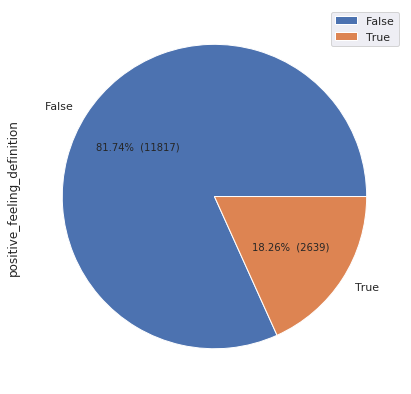

In [0]:
train['positive_feeling_definition'] = train['statement_feeling_score'] > 0
data_positive_feeling_definition = train['positive_feeling_definition'].value_counts()
data_positive_feeling_definition.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_positive_feeling_definition));

In [0]:
max_definition_feeling = train['statement_feeling_score'].max()
min_definition_feeling = train['statement_feeling_score'].min()

bins = [min_definition_feeling-1,-1,1,max_definition_feeling+1]
definition_feeling_range = ['Negative','Neutral','Positive']

train['statement_feeling_category'] = pd.cut(train['statement_feeling_score'],
                                                   bins,
                                                   labels=definition_feeling_range)

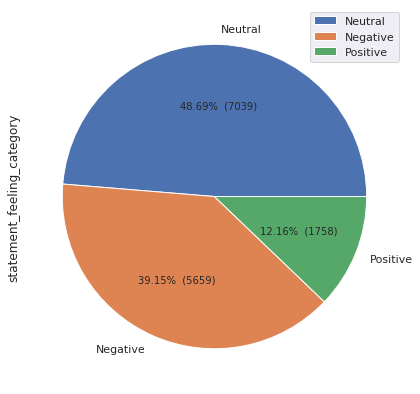

In [0]:
data_definition_feeling_category = train['statement_feeling_category'].value_counts()
data_definition_feeling_category.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_definition_feeling_category));

##**Doc2Vec**

Doc2vec is an adaptation of Word2Vec that allows us to learn document similarity. Doc2vec model by itself is an unsupervised method.

In [0]:
pip install tqdm

**Import required libraries**

In [0]:
import pandas as pd
import numpy as np
#from pandas.core.groupby import DataFrameGroupBy, SeriesGroupBy, GroupBy, PanelGroupBy
#from pandas.core.groupby import PanelGroupBy
from tqdm import tqdm
#tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

**Load the training dataset**

In [0]:
df = train
df = df[['statement','factLabel']]
df = df[pd.notnull(df['statement'])]
df.rename(columns = {'statement':'narrative'}, inplace = True)
df.rename(columns = {'factLabel':'category'}, inplace = True)
df.head(10)

,narrative,category
17069,The Daily 202 Mark Sanfords primary loss shows...,4.0
1137,Trump Embarrasses Himself Big Time With Whiny ...,0.0
14646,Trumps Infrastructure Plan Modest Federal Ince...,4.0
16158,Former FBI Assistant Director Says Anti-Trump ...,2.0
12154,Vanessa Trump Hospitalized Opened Mail With Un...,0.0
12479,This Josie Canseco Outfit Would Make A Fashion...,3.0
5704,COMMUNIST ENVIRONMENTAL PROTECTION This City o...,0.0
17954,2 children bitten by sharks off Fire Island Ne...,3.0
5521,Hillary Has Sent Over 1 Million From Onward To...,1.0
9415,Trump versus the Traitors on Capitol Hill,3.0


In [0]:
df.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Transformers/SnehalYeole/Credibility_FactChecks/enrichment/narrative_output.csv")

**Print the shape of dataset**

In [0]:
df.shape

(14456, 2)

In [0]:
df.index = range(14456)

In [0]:
df['narrative'].apply(lambda x: len(x.split(' '))).sum()

154227

In [0]:
df.isnull().sum()

narrative    0
category     0
dtype: int64

**Number of occurences for a particular category**

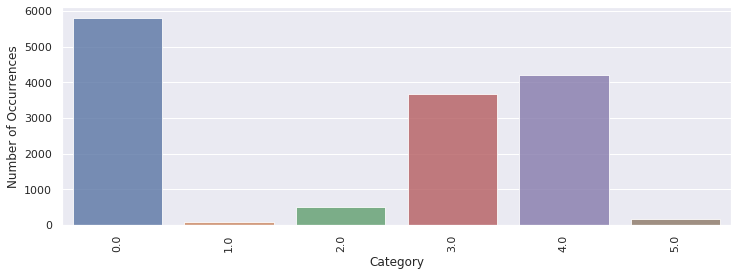

In [0]:
import seaborn as sns
cnt_pro = df['category'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

**Identify the label of a narrative**

In [0]:
def print_narrative(index):
    example = df[df.index == index][['narrative', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('category:', example[1])

In [0]:
print_narrative(11)

Batter Up Chairman Goodlatte Requests FISA Court Documents From Presiding Judge Rosemary Collyer
category: 0.0


## **Text Preprocessing**

Below we define a function to convert text to lower-case and strip punctuation/symbols from words and so on.

In [0]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['narrative'] = df['narrative'].apply(cleanText)

In [0]:
df['narrative'][3]

'former fbi assistant director says anti-trump cabal is evident'

In [0]:
df.shape

(14456, 2)

**Split the dataset into train and test sets**

In [0]:
train_new, test_new = train_test_split(df, test_size=0.3, random_state=42)

**Tokenization**

In [0]:
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

**Download the resource 'punkt'**

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Document Tagging**

In [0]:
train_tagged = train_new.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.category]), axis=1)
test_tagged = test_new.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.category]), axis=1)

In [0]:
train_tagged.values[30]

TaggedDocument(words=['russian', 'mma', 'fighter', 'questioned', 'by', 'fbi', 'over', 'trump', 'ties'], tags=[2.0])

## **Training the model**

I'll instantiate a Doc2Vec model-Distributed Bag of Words (DBOW). In the Word2Vec architecture, the two algorithm names are “continuous bag of words” (cbow) and “skip-gram” (sg); in the Doc2Vec architecture, the corresponding algorithms are “distributed bag of words” (dbow) and “distributed memory” (dm).

### **DBOW**

DBOW is the Doc2Vec model analogous to Skip-gram model in Word2Vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

Training a Doc2Vec model is rather straight forward in Gensim, I have initialize the model and train for 30 epochs:

I have set the minimum word count to 2 in order to discard words with very few occurrences.

In [0]:
import multiprocessing

cores = multiprocessing.cpu_count()

In [0]:
pip install tqdm

**Build a vocabulary**

In [0]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 10119/10119 [00:00<00:00, 1328933.91it/s]


In [0]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 10119/10119 [00:00<00:00, 1479749.05it/s]


CPU times: user 30.2 s, sys: 4.25 s, total: 34.4 s
Wall time: 23.6 s


**Buliding the final vector feature for the classifier**

In [0]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [0]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [0]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.37560525709015447
Testing F1 score: 0.3457540504414939


### **Distributed Memory with Averaging**

Distributed Memory (DM) acts as a memory that remembers what is missing from the current context — or as the topic of the paragraph. While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document. We again instantiate a Doc2Vec model with a vector size with 300 words and iterating over the training corpus 30 times.

In [0]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 10119/10119 [00:00<00:00, 1489198.67it/s]


In [0]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 10119/10119 [00:00<00:00, 2608935.47it/s]


CPU times: user 57.6 s, sys: 9.85 s, total: 1min 7s
Wall time: 53.5 s


###**5.5: Data Regularization**

Not applicable. Since, we are not dealing with any numerical values here, Data Regularization step is not implemented

###**5.6: Data Normalization**

Not applicable. Since, we are not dealing with any numerical values here, Data Normalization step is not implemented

## **Step 6. Unsupervised Exploration : Find relevant Clusters in Your Data**

Not applicable. Since, we are not forming any clusters/categories of features in the dataset and just predicting if a news is fake or not.

##**Step 7. Supervised Training Preparation: Data Curation : label your data set - Classification Algorithms before applying Word2Vec**

###**7.1** **Classify Your Data Sets : Run different classification algorithms**

###**7.2 Measure Classification Success - Print the matrix**

### **Logistic Regression**

In [0]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))


Testing accuracy 0.32441780032280376
Testing F1 score: 0.36389061827148794


In [0]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### **Decision Tree classifier**

**Create an instance of Decision Tree classifier**

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Train the Decision tree classifier**

In [0]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_predict = clf.predict(X_test)
y_predict

array([0., 4., 0., ..., 3., 0., 4.])

**Print Accuracy score**

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.32441780032280376
Testing F1 score: 0.36389061827148794


### **Random Forest Classifier**

**Create an instance of Random Forest classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Train the classifier**

In [0]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_predict = clf.predict(X_test)
y_predict

array([0., 0., 3., ..., 0., 4., 0.])

**Print Accuracy score**

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.32441780032280376
Testing F1 score: 0.36389061827148794


### **Support Vector Machine**

**Create an instance of SVM classifier**

In [0]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0)
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

**Train the classifier**

In [0]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predict = clf.predict(X_test)
y_predict

array([0., 3., 3., ..., 3., 4., 3.])

**Print the Accuracy**

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.32441780032280376
Testing F1 score: 0.36389061827148794


### **Naive Bayes Classifier**

In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_predict = clf.predict(X_test)
y_predict

array([0., 3., 3., ..., 3., 4., 3.])

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.32441780032280376
Testing F1 score: 0.36389061827148794


### **K - Nearest Neighbors**

In [0]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)

In [0]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
y_predict = clf.predict(X_test)
y_predict

array([0., 3., 3., ..., 3., 4., 3.])

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.32441780032280376
Testing F1 score: 0.36389061827148794


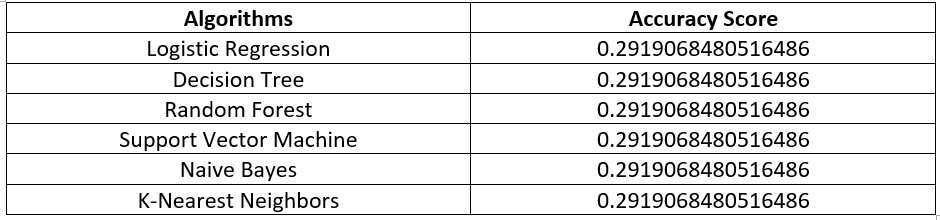

After applying Doc2Vec, I got the low accuracy score so I am going to apply Word2Vec to check if I get better accuracy

## **Word2Vec**

**Importing the required libraries**

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

**Creating feature vector - document term matrix**

In [0]:
countV = CountVectorizer()
train_count = countV.fit_transform(df['narrative'].values)

In [0]:
print(countV)
print(train_count)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
  (0, 17146)	2
  (0, 4503)	1
  (0, 178)	1
  (0, 10650)	1
  (0, 15003)	1
  (0, 13373)	1
  (0, 10339)	1
  (0, 15620)	1
  (0, 12752)	1
  (0, 12014)	1
  (0, 4371)	1
  (0, 17649)	1
  (1, 17649)	1
  (1, 5944)	1
  (1, 8219)	1
  (1, 2152)	1
  (1, 17293)	1
  (1, 18801)	1
  (1, 18659)	1
  (1, 16645)	1
  (1, 17759)	1
  (1, 13903)	1
  (1, 532)	1
  (1, 6499)	1
  (1, 11701)	1
  :	:
  (14453, 15023)	1
  (14453, 5970)	1
  (14453, 12308)	1
  (14454, 18801)	1
  (14454, 7986)	1
  (14454, 7159)	1
  (14454, 780)	1
  (14454, 15709)	1
  (14454, 8237)	1
  (14454, 5363)	1
  (14454, 9978)	1
  (14454, 821

**Check the vocabulary**

In [0]:
# Vocab size
train_count.shape

# Check vocabulary using below command
print(countV.vocabulary_)

{'the': 17146, 'daily': 4503, '202': 178, 'mark': 10650, 'sanfords': 15003, 'primary': 13373, 'loss': 10339, 'shows': 15620, 'peril': 12752, 'of': 12014, 'crossing': 4371, 'trump': 17649, 'embarrasses': 5944, 'himself': 8219, 'big': 2152, 'time': 17293, 'with': 18801, 'whiny': 18659, 'sunday': 16645, 'twitter': 17759, 'rant': 13903, 'about': 532, 'fake': 6499, 'news': 11701, 'trumps': 17667, 'infrastructure': 8876, 'plan': 12948, 'modest': 11236, 'federal': 6640, 'incentives': 8735, 'facing': 6465, 'long': 10300, 'odds': 12006, 'former': 7027, 'fbi': 6606, 'assistant': 1502, 'director': 5123, 'says': 15060, 'anti': 1152, 'cabal': 2827, 'is': 9142, 'evident': 6419, 'vanessa': 18151, 'hospitalized': 8387, 'opened': 12130, 'mail': 10505, 'unknown': 17950, 'white': 18674, 'powder': 13217, 'this': 17205, 'josie': 9386, 'canseco': 2937, 'outfit': 12277, 'would': 18908, 'make': 10520, 'fashion': 6571, 'critic': 4336, 'look': 10307, 'twice': 17754, 'communist': 3777, 'environmental': 6146, 'pr

**Create TF-IDF frequency features**

In [0]:
#create tf-idf frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

In [0]:
print(train_tfidf)

  (0, 17649)	0.11728619782113474
  (0, 17146)	0.19684431232008456
  (0, 15620)	0.24468538451957514
  (0, 15003)	0.39717394702717895
  (0, 13373)	0.2768166267230955
  (0, 12752)	0.36036081186106245
  (0, 12014)	0.1092756932794647
  (0, 10650)	0.2739110529816824
  (0, 10339)	0.30672546119456984
  (0, 4503)	0.27208454479640687
  (0, 4371)	0.39717394702717895
  (0, 178)	0.33251275014840675
  (1, 18801)	0.15999208936181658
  (1, 18659)	0.4068880301773592
  (1, 17759)	0.26650631325184676
  (1, 17649)	0.1252937000087869
  (1, 17293)	0.23463707707267836
  (1, 16645)	0.3299871081647468
  (1, 13903)	0.3324403028041837
  (1, 11701)	0.21899406094717047
  (1, 8219)	0.3052929268329496
  (1, 6499)	0.2618758029650959
  (1, 5944)	0.37713869261785554
  (1, 2152)	0.2444735560714908
  (1, 532)	0.18951493973733288
  :	:
  (14453, 3315)	0.25200782878850436
  (14453, 1447)	0.13766704399350932
  (14453, 1430)	0.2536397416762303
  (14454, 18801)	0.11978484227159031
  (14454, 15709)	0.2352425935892104
  (14454,

**vocabulary count using TF-IDF transform**

In [0]:
#vocab size
train_count.shape

#check vocabulary using below command
print(countV.vocabulary_)

#get feature names
print(countV.get_feature_names()[:25])


#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

{'the': 17146, 'daily': 4503, '202': 178, 'mark': 10650, 'sanfords': 15003, 'primary': 13373, 'loss': 10339, 'shows': 15620, 'peril': 12752, 'of': 12014, 'crossing': 4371, 'trump': 17649, 'embarrasses': 5944, 'himself': 8219, 'big': 2152, 'time': 17293, 'with': 18801, 'whiny': 18659, 'sunday': 16645, 'twitter': 17759, 'rant': 13903, 'about': 532, 'fake': 6499, 'news': 11701, 'trumps': 17667, 'infrastructure': 8876, 'plan': 12948, 'modest': 11236, 'federal': 6640, 'incentives': 8735, 'facing': 6465, 'long': 10300, 'odds': 12006, 'former': 7027, 'fbi': 6606, 'assistant': 1502, 'director': 5123, 'says': 15060, 'anti': 1152, 'cabal': 2827, 'is': 9142, 'evident': 6419, 'vanessa': 18151, 'hospitalized': 8387, 'opened': 12130, 'mail': 10505, 'unknown': 17950, 'white': 18674, 'powder': 13217, 'this': 17205, 'josie': 9386, 'canseco': 2937, 'outfit': 12277, 'would': 18908, 'make': 10520, 'fashion': 6571, 'critic': 4336, 'look': 10307, 'twice': 17754, 'communist': 3777, 'environmental': 6146, 'pr

**Function to get Count Vectorizer status**

In [0]:
#print training doc term matrix
#we have matrix of size of (10240, 12196) by calling below
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])


    #create tf-df frequency features
    #tf-idf 
    tfidfV = TfidfTransformer()
    train_tfidf = tfidfV.fit_transform(train_count)

In [0]:
def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])


    #bag of words - with n-grams
    #countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
    #tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

    tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

### **Part of Speech tagging**

In [0]:
#POS Tagging
import nltk
nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = df['narrative']
 
print(training_sentences)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
0        the daily 202 mark sanfords primary loss shows...
1        trump embarrasses himself big time with whiny ...
2        trumps infrastructure plan modest federal ince...
3        former fbi assistant director says anti-trump ...
4        vanessa trump hospitalized opened mail with un...
                               ...                        
14451                  sleeping habits linked to fat level
14452      maldives lifts state of emergency after 45 days
14453    arsenal 1-1 chelsea 6-5 penalties 5 talking po...
14454    dog lover has legs amputated after single lick...
14455             republicans sessions gone after midterms
Name: narrative, Length: 14456, dtype: object


In [0]:
#training POS tagger based on words
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
}

In [0]:
#helper function to strip tags from tagged corpus
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

### **5.3  Amalgamation I - Amalgamation of Liar Liar dataset with glove.6B.50d dataset (dictionary)**

**Loading the 'glove.6B.50d' dataset**

In [0]:
#Using Word2Vec 
with open("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Transformers/SnehalYeole/Datasets_NELA/Datasets/glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
for line in lines}

### **Count Vectorizer**

In [0]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [0]:
train_tfidf.shape

(14456, 19096)

In [0]:
countV

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['narrative'].values)
print(vectorizer.get_feature_names())

['000', '015', '016', '017', '019', '020818', '021', '022', '10', '100', '1000', '10000', '100000', '1000000', '1000th', '100bn', '100k', '100m', '100mph', '100s', '100th', '101', '1010', '103', '1040', '105', '107', '10k', '10m', '10s', '10th', '11', '110', '11000', '112', '1125m', '112m', '115000', '1175', '11750', '119', '11am', '11th', '12', '120', '1200', '12000', '120000', '120db', '124', '125', '1250', '125yr', '126', '127', '12th', '12yo', '13', '130000', '13039s', '132000', '133', '13500', '137', '138300', '13s', '13th', '14', '1400', '141', '144', '145', '147', '1472nd', '148', '149', '14th', '15', '150', '15000', '150000', '151', '1517', '152', '1526', '153', '154', '156', '15900', '15s', '15th', '16', '160', '160000', '161', '163', '163100k', '163100m', '163226m', '1632bn', '16356m', '16380bn', '168', '16th', '17', '170', '17000', '173', '174', '1740', '175', '175k', '176', '17m', '18', '180', '1800', '180000', '18000000', '182', '184', '1861', '18th', '19', '1930', '1930s'

In [0]:
df['feature_names'] = X
df.to_csv("/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Transformers/SnehalYeole/Credibility_FactChecks/enrichment/word2vec_enriched.csv")

In [0]:
from sklearn.feature_extraction.text import HashingVectorizer
# create the transform
vectorizer = HashingVectorizer(n_features=5)
# encode document
vector = vectorizer.transform(df['narrative'].values)
# summarize encoded vector
print(vector.shape)

# Feature Credibility %25 truth vector
print(vector.toarray() *  0.25)

(14456, 5)
[[ 0.04642383  0.18569534  0.09284767 -0.09284767 -0.09284767]
 [ 0.18898224 -0.09449112 -0.09449112  0.          0.09449112]
 [ 0.09449112  0.         -0.09449112  0.09449112  0.18898224]
 ...
 [-0.15811388  0.          0.07905694 -0.07905694  0.15811388]
 [-0.09449112 -0.18898224 -0.09449112  0.09449112  0.        ]
 [-0.14433757  0.          0.          0.14433757 -0.14433757]]


##**Step 7. Supervised Training Preparation: Data Curation : label your data set - Classification Algorithms after first amalgamation -  Word2Vec embeddings**

###**7.1** **Classify Your Data Sets : Run different classification algorithms**


###**7.2 Measure Classification Success - Print the matrix**

**Import required libraries**

In [0]:
import sys
#sys.path.append("/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset")
#import DataPrep
#import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

**Provide the string for testing**

In [0]:
#string to test
doc_new = ['obama is running for president in 2022']

**Python code to plot the Confusion matrix**

In [0]:
import seaborn as sns
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    #confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train):
        train_text = train.iloc[train_ind]['statement'] 
        train_y = train.iloc[train_ind]['factLabel']
    
        test_text = train.iloc[test_ind]['statement']
        test_y = train.iloc[test_ind]['factLabel']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        #confusion += confusion_matrix(test_y,predictions)
        #score = f1_score(test_y,predictions)
        #scores.append(score)
    
    #print('Total statements classified:{}'.format(len(train_news)))
    #print('Score:{}'.format(sum(scores)/len(scores)))
    #print('Score length:{}'.format(len(scores)))
    #cm = confusion
    sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

###**Pipeline:** **Use of Pipelines with count vectorizer to train the classification models**

Let's run our models using the pipeline and then predict off the test set. We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [0]:
from sklearn.metrics import accuracy_score
#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(train['statement'],train['factLabel'])
predicted_nb = nb_pipeline.predict(test['statement'])
score = accuracy_score(test['factLabel'], predicted_nb)
print("Accuracy for Multinomial Naive Bayes:   %0.6f" % score)
print("Mean for Multinomial Bayes: ", np.mean(predicted_nb == test['factLabel']))

Accuracy for Multinomial Naive Bayes:   0.504564
Mean for Multinomial Bayes:  0.5045643153526971


**Classification Report:**

In [0]:
print(classification_report(test['factLabel'], predicted_nb))

              precision    recall  f1-score   support

         0.0       0.54      0.68      0.60      1508
         1.0       0.00      0.00      0.00        12
         2.0       0.60      0.03      0.05       118
         3.0       0.44      0.37      0.40       892
         4.0       0.49      0.44      0.46      1038
         5.0       0.00      0.00      0.00        47

    accuracy                           0.50      3615
   macro avg       0.34      0.25      0.25      3615
weighted avg       0.49      0.50      0.49      3615



**Print Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(predicted_nb, test['factLabel'])
print('Confusion Matrix for Multinomial Naive Bayes Classifier:\n')
print(confusion)

Confusion Matrix for Multinomial Naive Bayes Classifier:

[[1031    6   77  377  422   11]
 [   0    0    0    0    0    0]
 [   1    0    3    1    0    0]
 [ 215    2   25  330  156   17]
 [ 261    4   13  184  460   19]
 [   0    0    0    0    0    0]]


**Plot Confusion matrix**

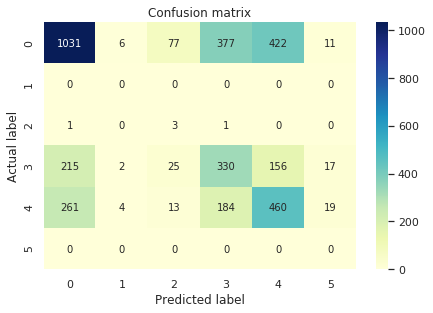

In [0]:
build_confusion_matrix(nb_pipeline)

### **Logistic Regression**

In [0]:
#building classifier using logistic regression
logR_pipeline = Pipeline([
        ('LogRCV',countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(train['statement'],train['factLabel'])
predicted_LogR = logR_pipeline.predict(test['statement'])
score = accuracy_score(test['factLabel'], predicted_LogR)
print("Accuracy for Logistic Regression:   %0.6f" % score)
print("Mean for Logistic Regression: ", np.mean(predicted_LogR == test['factLabel']))

Accuracy for Logistic Regression:   0.489073
Mean for Logistic Regression:  0.489073305670816


**Classification Report**

In [0]:
print(classification_report(test['factLabel'], predicted_LogR))

              precision    recall  f1-score   support

         0.0       0.53      0.63      0.58      1508
         1.0       0.00      0.00      0.00        12
         2.0       0.45      0.11      0.18       118
         3.0       0.42      0.36      0.39       892
         4.0       0.46      0.47      0.46      1038
         5.0       1.00      0.09      0.16        47

    accuracy                           0.49      3615
   macro avg       0.48      0.27      0.29      3615
weighted avg       0.49      0.49      0.48      3615



**Print Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(predicted_LogR, test['factLabel'])
print('Confusion Matrix for Logistic Regression Classifier:\n')
print(confusion)

Confusion Matrix for Logistic Regression Classifier:

[[948   3  69 357 388  10]
 [  1   0   1   1   0   0]
 [ 10   0  13   4   2   0]
 [233   4  22 320 165  13]
 [316   5  13 210 483  20]
 [  0   0   0   0   0   4]]


**Plot Confusion matrix**

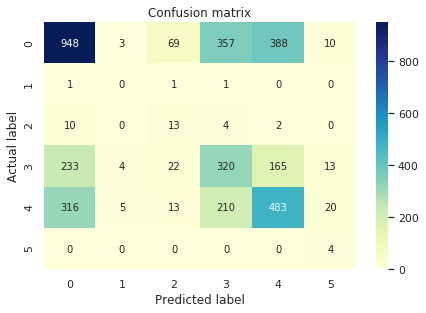

In [0]:
build_confusion_matrix(logR_pipeline)

### **Support Vector Machine**

In [0]:
#building Linear SVM classfier
svm_pipeline = Pipeline([
        ('svmCV',countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(train['statement'],train['factLabel'])
predicted_svm = svm_pipeline.predict(test['statement'])
score = accuracy_score(test['factLabel'], predicted_svm)
print("Accuracy for Support Vector Machine:   %0.6f" % score)
print("Mean for Support Vector Machine: ", np.mean(predicted_svm == test['factLabel']))

Accuracy for Support Vector Machine:   0.472199
Mean for Support Vector Machine:  0.4721991701244813


**Classification Report**

In [0]:
print(classification_report(test['factLabel'], predicted_svm))

              precision    recall  f1-score   support

         0.0       0.55      0.54      0.55      1508
         1.0       0.10      0.08      0.09        12
         2.0       0.30      0.21      0.25       118
         3.0       0.40      0.40      0.40       892
         4.0       0.44      0.48      0.46      1038
         5.0       0.42      0.17      0.24        47

    accuracy                           0.47      3615
   macro avg       0.37      0.31      0.33      3615
weighted avg       0.47      0.47      0.47      3615



**Print Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(predicted_svm, test['factLabel'])
print('Confusion Matrix for SVM Classifier:\n')
print(confusion)

Confusion Matrix for SVM Classifier:

[[821   2  46 295 323   4]
 [  2   1   1   3   3   0]
 [ 35   0  25  14   9   0]
 [288   4  27 354 201  18]
 [358   5  19 223 498  17]
 [  4   0   0   3   4   8]]


**Plot Confusion matrix**

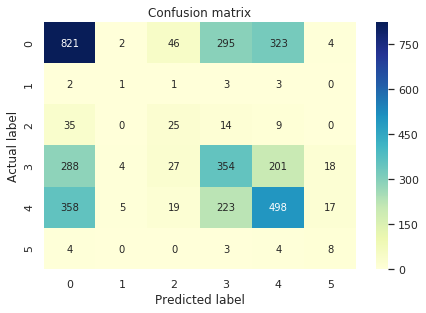

In [0]:
build_confusion_matrix(svm_pipeline)

### **Stochastic Gradient Descent**

In [0]:
#using SVM Stochastic Gradient Descent on hinge loss
sgd_pipeline = Pipeline([
        ('svm2CV',countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline.fit(train['statement'],train['factLabel'])
predicted_sgd = sgd_pipeline.predict(test['statement'])
score = accuracy_score(test['factLabel'], predicted_sgd)
print("Accuracy for Stochastic Gradient Descent:   %0.6f" % score)
print("Mean for Stochastic Gradient Descent: ", np.mean(predicted_sgd == test['factLabel']))

Accuracy for Stochastic Gradient Descent:   0.485754
Mean for Stochastic Gradient Descent:  0.48575380359612724


**Classification Report**

In [0]:
print(classification_report(test['factLabel'], predicted_sgd))

              precision    recall  f1-score   support

         0.0       0.50      0.72      0.59      1508
         1.0       0.00      0.00      0.00        12
         2.0       0.36      0.10      0.16       118
         3.0       0.44      0.25      0.32       892
         4.0       0.48      0.41      0.44      1038
         5.0       0.50      0.09      0.15        47

    accuracy                           0.49      3615
   macro avg       0.38      0.26      0.28      3615
weighted avg       0.47      0.49      0.46      3615



**Print Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(predicted_sgd, test['factLabel'])
print('Confusion Matrix for Stochastic Gradient Descent Classifier:\n')
print(confusion)

Confusion Matrix for Stochastic Gradient Descent Classifier:

[[1084    7   81  470  497   17]
 [   0    0    0    1    0    0]
 [  14    0   12    6    1    0]
 [ 156    1   15  227  110    7]
 [ 253    4   10  186  429   19]
 [   1    0    0    2    1    4]]


**Plot Confusion matrix**

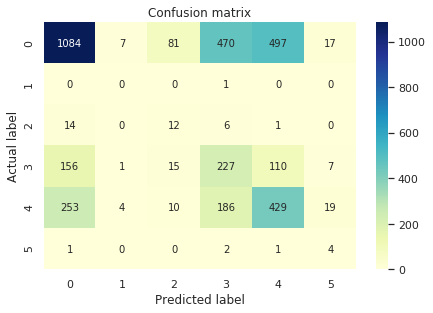

In [0]:
build_confusion_matrix(sgd_pipeline)

### **Decision Tree**

In [0]:
#random forest
decision_tree = Pipeline([
        ('dtCV',countV),
        ('dt_clf',DecisionTreeClassifier())
        ])
    
decision_tree.fit(train['statement'],train['factLabel'])
predicted_dt = decision_tree.predict(test['statement'])
score = accuracy_score(test['factLabel'], predicted_dt)
print("Accuracy for Decision Tree:   %0.6f" % score)
print("Mean for Decision Tree: ", np.mean(predicted_dt == test['factLabel']))

Accuracy for Decision Tree:   0.435685
Mean for Decision Tree:  0.43568464730290457


**Classification Report**

In [0]:
print(classification_report(test['factLabel'], predicted_dt))

              precision    recall  f1-score   support

         0.0       0.51      0.59      0.55      1508
         1.0       0.07      0.08      0.07        12
         2.0       0.23      0.14      0.18       118
         3.0       0.38      0.32      0.35       892
         4.0       0.37      0.37      0.37      1038
         5.0       0.33      0.13      0.18        47

    accuracy                           0.44      3615
   macro avg       0.32      0.27      0.28      3615
weighted avg       0.43      0.44      0.43      3615



**Print Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(predicted_dt, test['factLabel'])
print('Confusion Matrix for Decision Tree Classifier:\n')
print(confusion)

Confusion Matrix for Decision Tree Classifier:

[[884   3  47 350 436  13]
 [  2   1   2   6   3   1]
 [ 25   0  17  11  18   2]
 [230   3  21 288 198  12]
 [360   5  31 236 379  13]
 [  7   0   0   1   4   6]]


**Plot Confusion matrix**

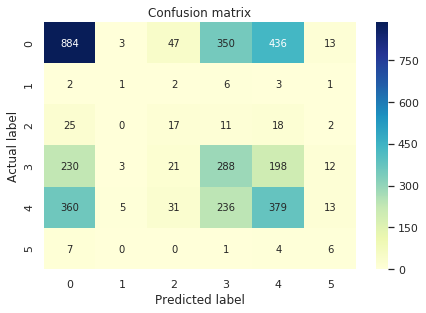

In [0]:
build_confusion_matrix(decision_tree)

### **Random Forest**

In [0]:
#random forest
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train['statement'],train['factLabel'])
predicted_rf = random_forest.predict(test['statement'])
score = accuracy_score(test['factLabel'], predicted_rf)
print("Accuracy for Random Forest:   %0.6f" % score)
print("Mean for Random Forest: ", np.mean(predicted_rf == test['factLabel']))

Accuracy for Random Forest:   0.506777
Mean for Random Forest:  0.5067773167358229


**Classification Report**

In [0]:
print(classification_report(test['factLabel'], predicted_rf))

              precision    recall  f1-score   support

         0.0       0.50      0.84      0.62      1508
         1.0       0.00      0.00      0.00        12
         2.0       0.57      0.07      0.12       118
         3.0       0.56      0.20      0.30       892
         4.0       0.51      0.36      0.42      1038
         5.0       0.90      0.19      0.32        47

    accuracy                           0.51      3615
   macro avg       0.51      0.28      0.30      3615
weighted avg       0.52      0.51      0.46      3615



**Print Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(predicted_rf, test['factLabel'])
print('Confusion Matrix for Random Forest Classifier:\n')
print(confusion)

Confusion Matrix for Random Forest Classifier:

[[1260    8   90  557  599   23]
 [   0    0    0    0    0    0]
 [   4    0    8    2    0    0]
 [  67    0    5  182   66    4]
 [ 176    4   15  151  373   11]
 [   1    0    0    0    0    9]]


**Plot Confusion matrix**

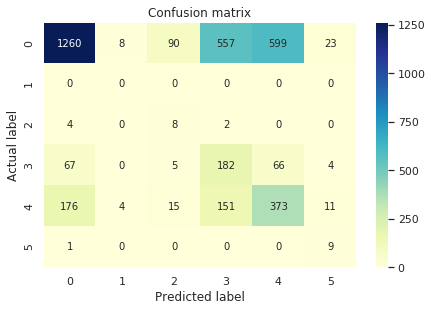

In [0]:
build_confusion_matrix(random_forest)

###**KNN**

In [0]:
#random forest
k_nn = Pipeline([
        ('knnCV',countV),
        ('knn_clf',KNeighborsClassifier(n_neighbors=3))
        ])
    
k_nn.fit(train['statement'],train['factLabel'])
predicted_knn = k_nn.predict(test['statement'])
score = accuracy_score(test['factLabel'], predicted_knn)
print("Accuracy for K-Nearest Neighbor:   %0.6f" % score)
print("Mean for  K-Nearest Neighbor: ", np.mean(predicted_knn == test['factLabel']))

Accuracy for K-Nearest Neighbor:   0.422960
Mean for  K-Nearest Neighbor:  0.42295988934993084


**Classification Report**

In [0]:
print(classification_report(test['factLabel'], predicted_knn))

              precision    recall  f1-score   support

         0.0       0.44      0.81      0.57      1508
         1.0       0.00      0.00      0.00        12
         2.0       0.75      0.03      0.05       118
         3.0       0.36      0.09      0.15       892
         4.0       0.38      0.21      0.27      1038
         5.0       0.67      0.04      0.08        47

    accuracy                           0.42      3615
   macro avg       0.43      0.20      0.19      3615
weighted avg       0.41      0.42      0.35      3615



**Print Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(predicted_knn, test['factLabel'])
print('Confusion Matrix for KNN Classifier:\n')
print(confusion)

Confusion Matrix for KNN Classifier:

[[1220   12   89  670  761   34]
 [   0    0    0    2    0    0]
 [   0    0    3    1    0    0]
 [  87    0    4   83   55    3]
 [ 201    0   22  136  221    8]
 [   0    0    0    0    1    2]]


**Plot Confusion matrix**

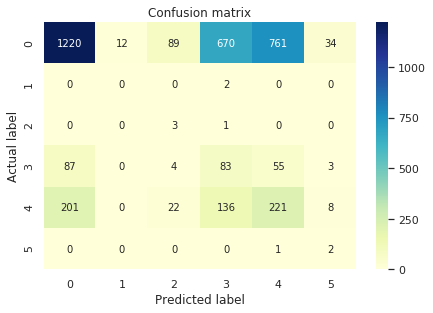

In [0]:
build_confusion_matrix(k_nn)

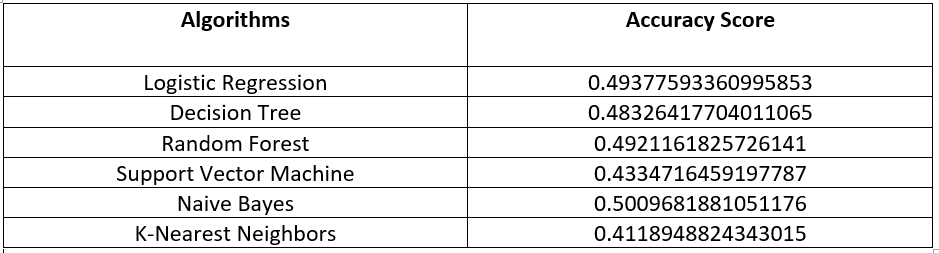

After applying Word2Vec and one data enrichment -  with glove dictionary , I got the better accuracy score among which Random Forest is the highest with 50.00%

## **Step 8. Metrics and Evaluation**


1. **F1, R2, RMSE**


2. **Precision, Recall, Accuracy**


3. **Confusion Matrix**

In [0]:
#Calculate the accuracy
# Accuracy = TP+TN/TP+FP+FN+TN 
def plot_accuracy():
    print(accuracy_score(y_test,y_pred))

**Confusion Matrix**

In [0]:
from sklearn.metrics import confusion_matrix
def other_metrics():
    confusion = confusion_matrix(predicted_rf, DataPrep.test_news['Label'])
    print('Confusion Matrix for Random Forest Classifier:\n')
    print(confusion)

**Other Metrics**

In [0]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
def other_metrics():     
    print(accuracy_score(y_test,y_pred))
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

**Precision, Recall, ROC Curve**

In [0]:
# Function for evaluation reports
def get_eval(clf, X_train, y_train,y_test,y_pred):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    return

# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return

##**Step 9. Distillation**



Distillation Process:

      *  Data Preprocessing
      *  Bag of Words
      *  TF-IDF
      *  Doc2Vec
      *  Word2Vec
      *  LDA Topic Modeling
      *  Count Vectorizer
      *  MeanEmbeddingVectorizer
      *  Speaker Sentiment Analysis to assess credibility

**NOTE:**  The distillation process on NELA is performed as part of data preprocessing.Please refer to the code above.

## **Predicting if a news is fake or not**

**Take the input from user**

In [0]:
import pickle
#obama is running for president in 2016
#Denali is the Kenyan word for black power.

var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Trump is the president of United states
You entered: Trump is the president of United states


**Finalize and save the model in drive**

In [0]:
from sklearn.externals import joblib 
import pickle
# Save the model as a pickle in a file 
pickle.dump(random_forest, open('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Transformers/SnehalYeole/Credibility_FactChecks/Model/credibility_factchecks.pkl', 'wb')) 

**Load the model and predict the news for fakeness**

In [0]:
#function to run for prediction
def detecting_fake_news(var):    
#retrieving the best model for prediction call
    load_model = pickle.load(open('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Transformers/SnehalYeole/Credibility_FactChecks/Model/credibility_factchecks.pkl', 'rb'))
    #load_model = pickle.load(open('/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Model/nb.pkl', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The given statement is ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))

**Call the function**

In [0]:
detecting_fake_news(var)

The given statement is  4.0
The truth probability score is  0.0


(None, None)

In order to predict the fakeness or truthfulness in news, the media checks/factual reporting label are chosen from the dataset.

**Meaning of labels are:**

The range (bad)1-5(good) means that the value closer to 1 means probability of a news is to be fake/bad. Whereas, value closer to 4 means that the probability of a news is to be good/non-fake.

The prediction we are getting for the input statement is **4.0** which means that the statement is **not fake**.

## **Conclusion:**

To begin with the implementation of my individual factor on the NELA dataset, I have read the **Article on Fake News**: https://arxiv.org/pdf/1708.01967.pdf. Based on the article, I selected few factors/features which plays an important role in detection of fake news on social media. 

**Factor selection:**
*   Credibility/Fact Checks





In this experiment, I conducted a research on detection of fake news on the NELA dataset based on a factor **"Credibility/Fact Checks"**. The chosen factor were based on the suggestions provided by Shu et al. (2017). While none of the factors alone can be applied for detection of fake news in a satisfactory way, they can be used in the final collective model (polynimial equation) to detect the fake news.

Initially, the accuracy of the models after applying classification algorithms on the base dataset - NELA dataset was low. After amalgamating the base dataset with glove dictionary and applying Word2Vec, the accuracy of the model improved by almost 20% and it is able to predict the fakeness or truthfulness of the given news.

## **References:**

*   https://www.kaggle.com/watts2/glove6b50dtxt#glove.6B.50d.txt
*   https://github.com/anuksebastian/AlternusVera/blob/master/AnuSebastian_012496276_PoliticalAffiliation_SocialMedia/AlternusVera_012496276_political_affiliation_AnuSebastian.ipynb
*   https://github.com/nishitpatel01/Fake_News_Detection
*   https://arxiv.org/pdf/1904.01546.pdf



